# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('/kaggle/input/bcgvirtualforage/client_data.csv')
price_df = pd.read_csv('/kaggle/input/bcgvirtualforage/price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t      0.00   
1      2009-08-21   2015-08-31             189.95  ...        f      0.00   
2      2010-04-16   2015-04-17              47.96  ...        f      0.00   
3      2010-03-30   2015-03-31             240.04  ...        f      0.00   
4      2010-01-13   2015-03-09             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

In [4]:
price_df.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [ ]:
"""
client_data.csv

●	id = client company identifier
●	activity_new = category of the company’s activity
●	channel_sales = code of the sales channel
●	cons_12m = electricity consumption of the past 12 months
●	cons_gas_12m = gas consumption of the past 12 months
●	cons_last_month = electricity consumption of the last month
●	date_activ = date of activation of the contract
●	date_end = registered date of the end of the contract
●	date_modif_prod = date of the last modification of the product
●	date_renewal = date of the next contract renewal
●	forecast_cons_12m = forecasted electricity consumption for next 12 months
●	forecast_cons_year = forecasted electricity consumption for the next calendar year
●	forecast_discount_energy = forecasted value of current discount
●	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
●	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
●	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
●	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
●	has_gas = indicated if client is also a gas client
●	imp_cons = current paid consumption
●	margin_gross_pow_ele = gross margin on power subscription
●	margin_net_pow_ele = net margin on power subscription
●	nb_prod_act = number of active products and services
●	net_margin = total net margin
●	num_years_antig = antiquity of the client (in number of years)
●	origin_up = code of the electricity campaign the customer first subscribed to
●	pow_max = subscribed power
●	churn = has the client churned over the next 3 months

price_data.csv

●	id = client company identifier
●	price_date = reference date
●	price_off_peak_var = price of energy for the 1st period (off peak)
●	price_peak_var = price of energy for the 2nd period (peak)
●	price_mid_peak_var = price of energy for the 3rd period (mid peak)
●	price_off_peak_fix = price of power for the 1st period (off peak)
●	price_peak_fix = price of power for the 2nd period (peak)
●	price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power
"""

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 193002 entries, 0 to 193001

Data columns (total 8 columns):

 #   Column              Non-Null Count   Dtype  

---  ------              --------------   -----  

 0   id                  193002 non-null  object 

 1   price_date          193002 non-null  object 

 2   price_off_peak_var  193002 non-null  float64

 3   price_peak_var      193002 non-null  float64

 4   price_mid_peak_var  193002 non-null  float64

 5   price_off_peak_fix  193002 non-null  float64

 6   price_peak_fix      193002 non-null  float64

 7   price_mid_peak_fix  193002 non-null  float64

dtypes: float64(6), object(2)

memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [6]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [7]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [6]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

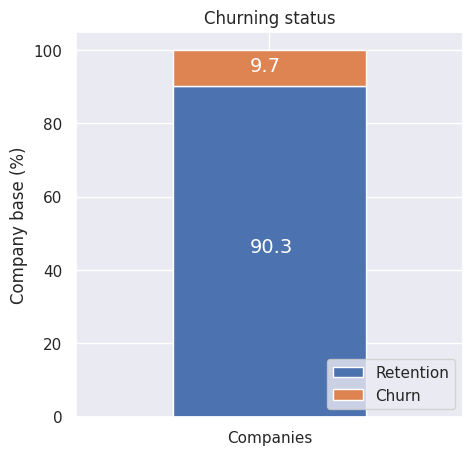

In [9]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

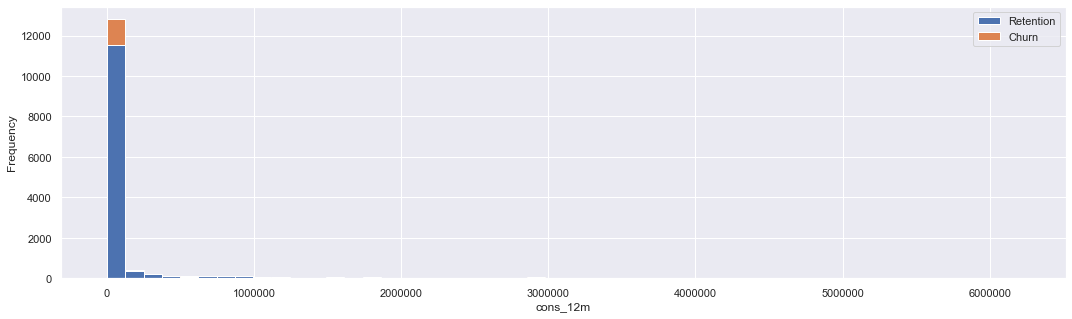

In [11]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [22]:
merged_df = pd.merge(price_df, client_df, on = "id", how = "inner")
merged_df["price_sensitivity"] = merged_df["price_off_peak_var"] / merged_df["cons_12m"]

### email

Price sensitivity can be modeled by modeling the change in consumption against prices. As prices increase we can see hwo consumption is changing.

In [57]:
merged_df["id"] = merged_df["id"].astype("category")
merged_df["has_gas"] = merged_df["has_gas"].astype("category")
merged_df["origin_up"] = merged_df["origin_up"].astype("category")
merged_df["channel_sales"] = merged_df["channel_sales"].astype("category")

In [64]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  category      
 1   price_date                      175149 non-null  datetime64[ns]
 2   price_off_peak_var              175149 non-null  float64       
 3   price_peak_var                  175149 non-null  float64       
 4   price_mid_peak_var              175149 non-null  float64       
 5   price_off_peak_fix              175149 non-null  float64       
 6   price_peak_fix                  175149 non-null  float64       
 7   price_mid_peak_fix              175149 non-null  float64       
 8   channel_sales                   175149 non-null  category      
 9   cons_12m                        175149 non-null  int64         
 10  cons_gas_12m                    175149 non-null  int64  

In [60]:
merged_df["price_date"] = pd.to_datetime(merged_df["price_date"])
merged_df["date_activ"] = pd.to_datetime(merged_df["date_activ"])
merged_df["date_end"] = pd.to_datetime(merged_df["date_end"])
merged_df["date_modif_prod"] = pd.to_datetime(merged_df["date_modif_prod"])
merged_df["date_renewal"] = pd.to_datetime(merged_df["date_renewal"])

In [61]:
X = merged_df.drop("churn", axis = 1)
y = merged_df["churn"]

In [75]:
split_index = int(len(merged_df) * 0.8)

train_df = merged_df.iloc[:split_index]
test_df = merged_df.iloc[split_index:]

X_train = train_df.drop(["id","churn","price_date", "date_activ", "date_end", "date_modif_prod", "date_renewal", "channel_sales", "has_gas", "origin_up"], axis = 1)
y_train = train_df["churn"]

X_test = test_df.drop(["id","churn", "price_date", "date_activ", "date_end", "date_modif_prod", "date_renewal", "channel_sales", "has_gas", "origin_up"], axis = 1)
y_test = test_df["churn"]

In [78]:
X_train.dropna(inplace = True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

In [32]:
from sklearn.metrics import accuracy_score

### Sales Channels

In [24]:
channel = client_df[["id", "channel_sales", "churn"]]
channel = channel.groupby([channel['channel_sales'], channel['churn'] ])['id'].count().unstack(level = 1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis = 0) * 100).sort_values(by= [1] , ascending = False)

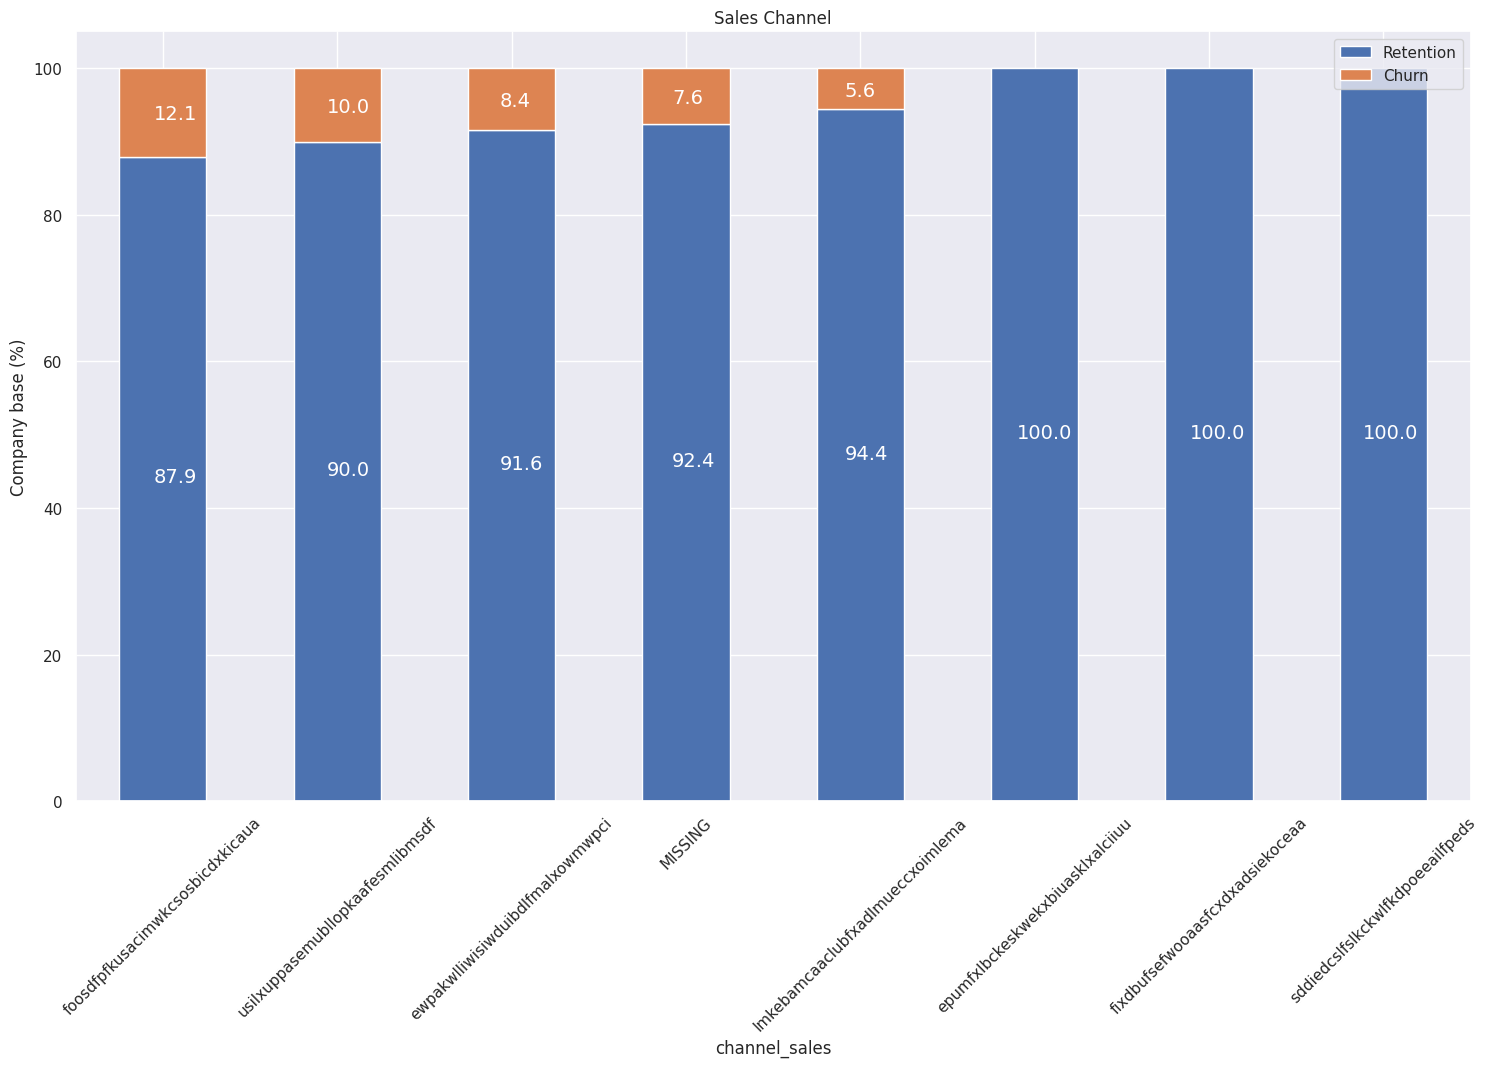

In [25]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_= 45)

### Consumption

In [8]:
consumption = client_df[["id", "cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

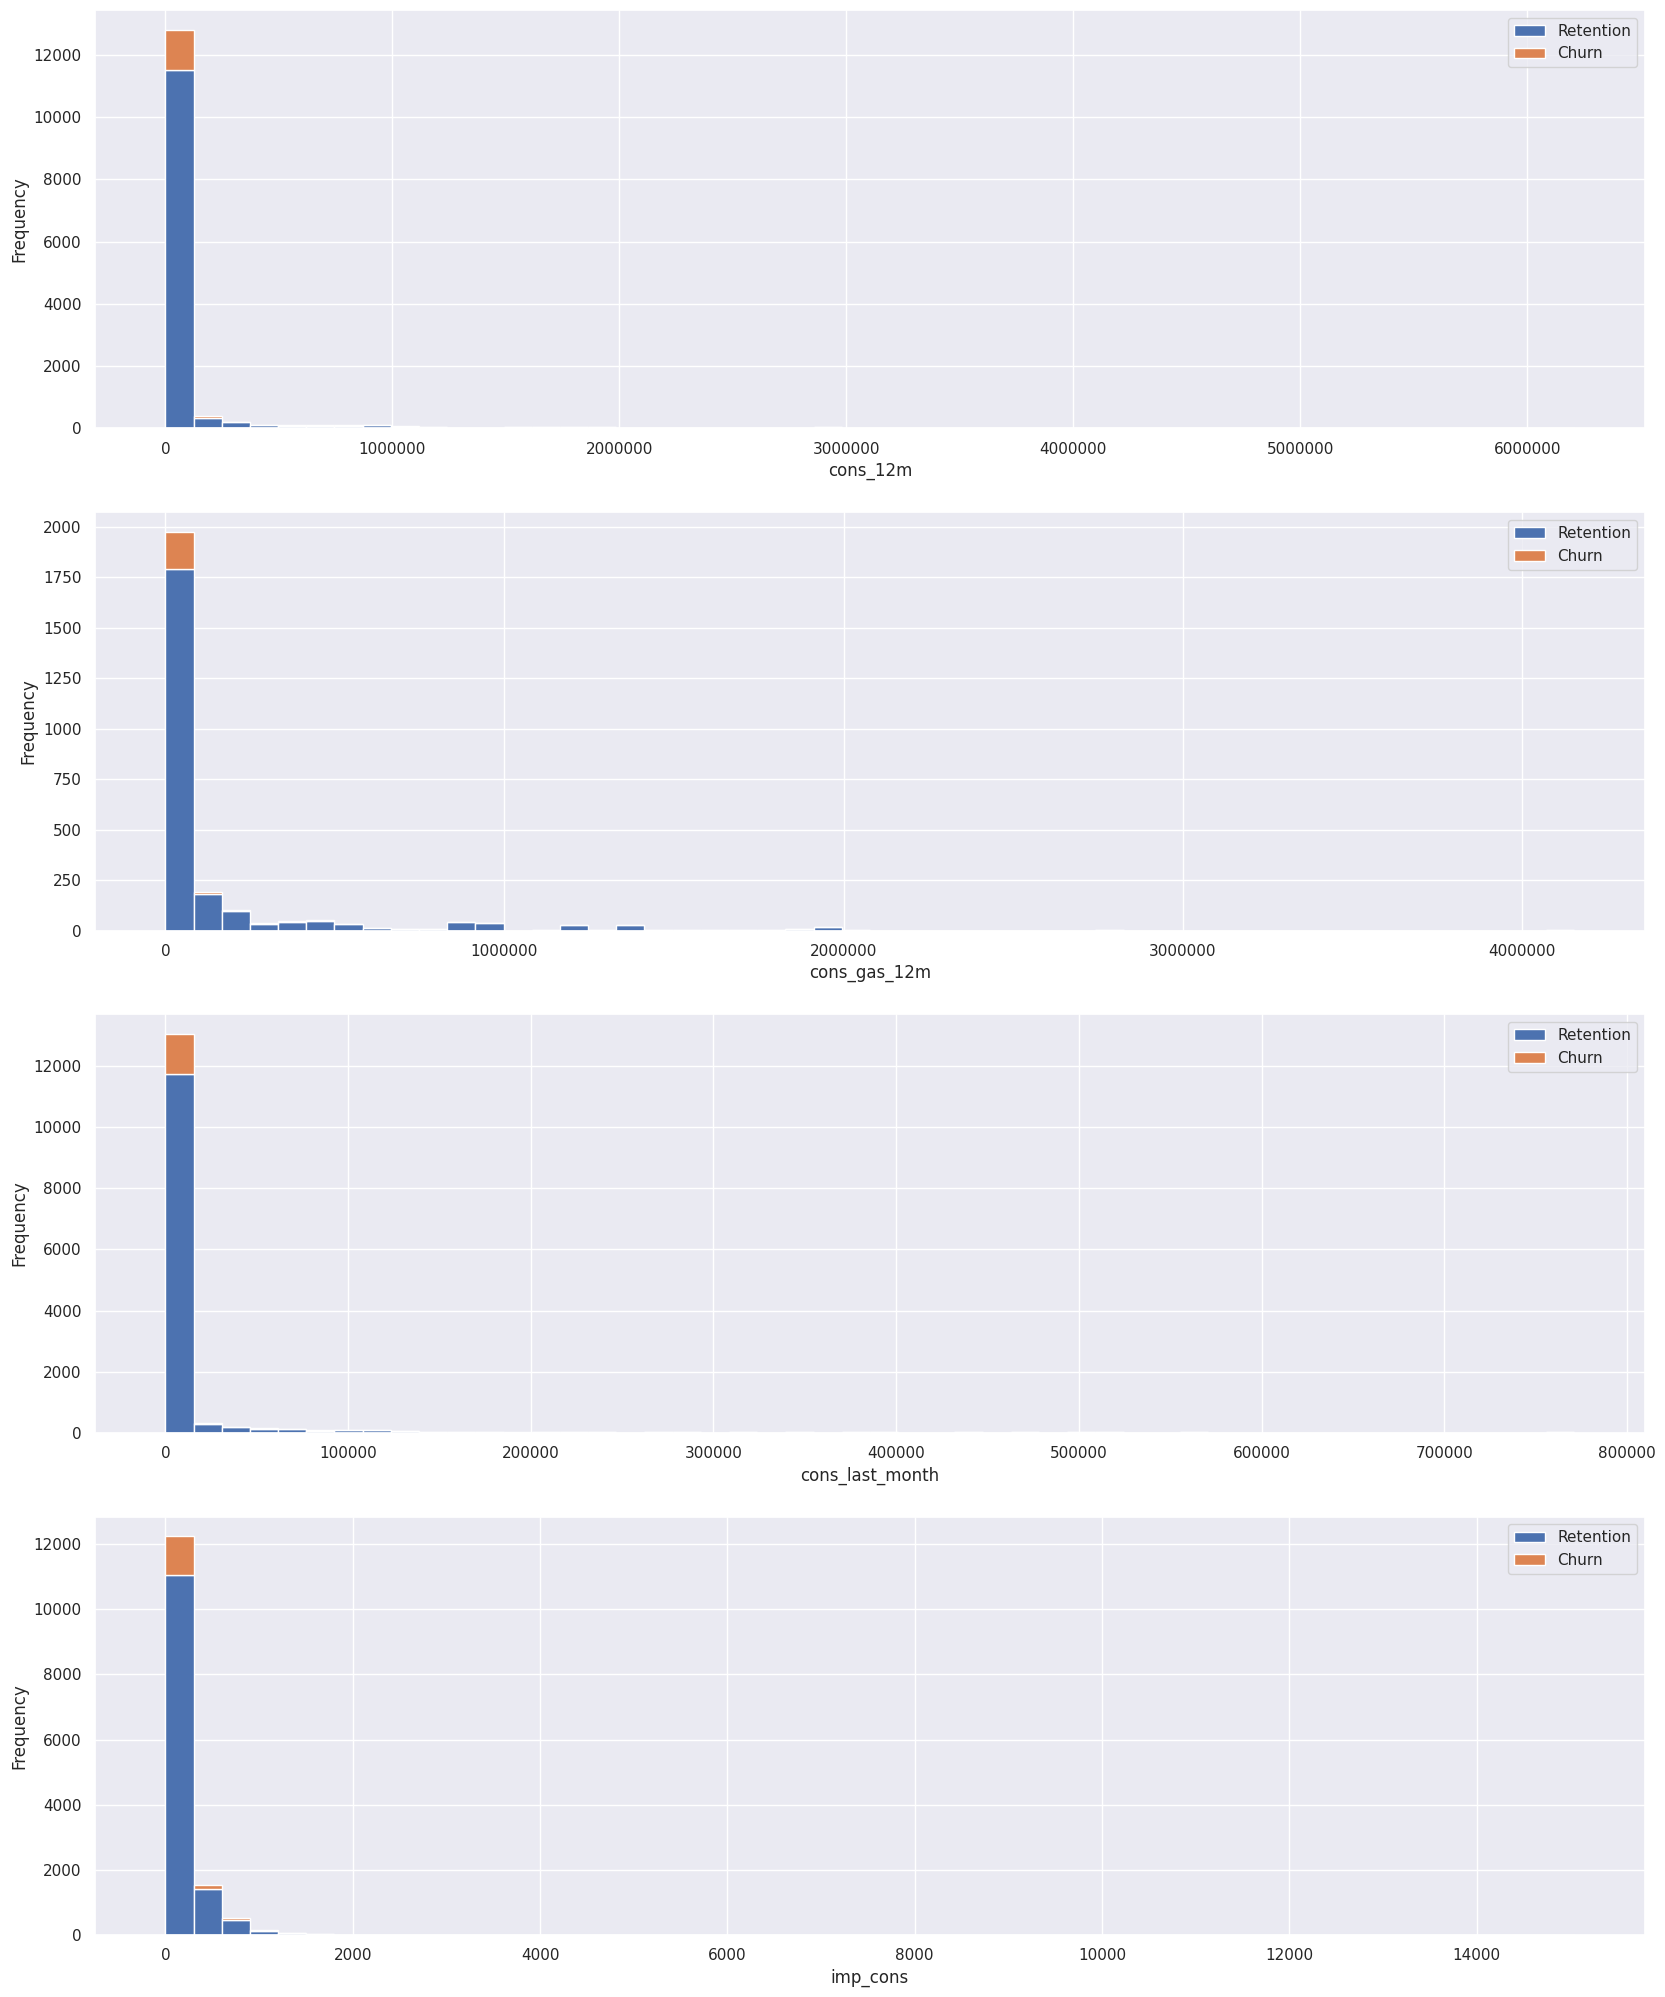

In [15]:
fig, axs = plt.subplots(nrows=4, figsize=(20,25))

plot_distribution(consumption, "cons_12m", axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

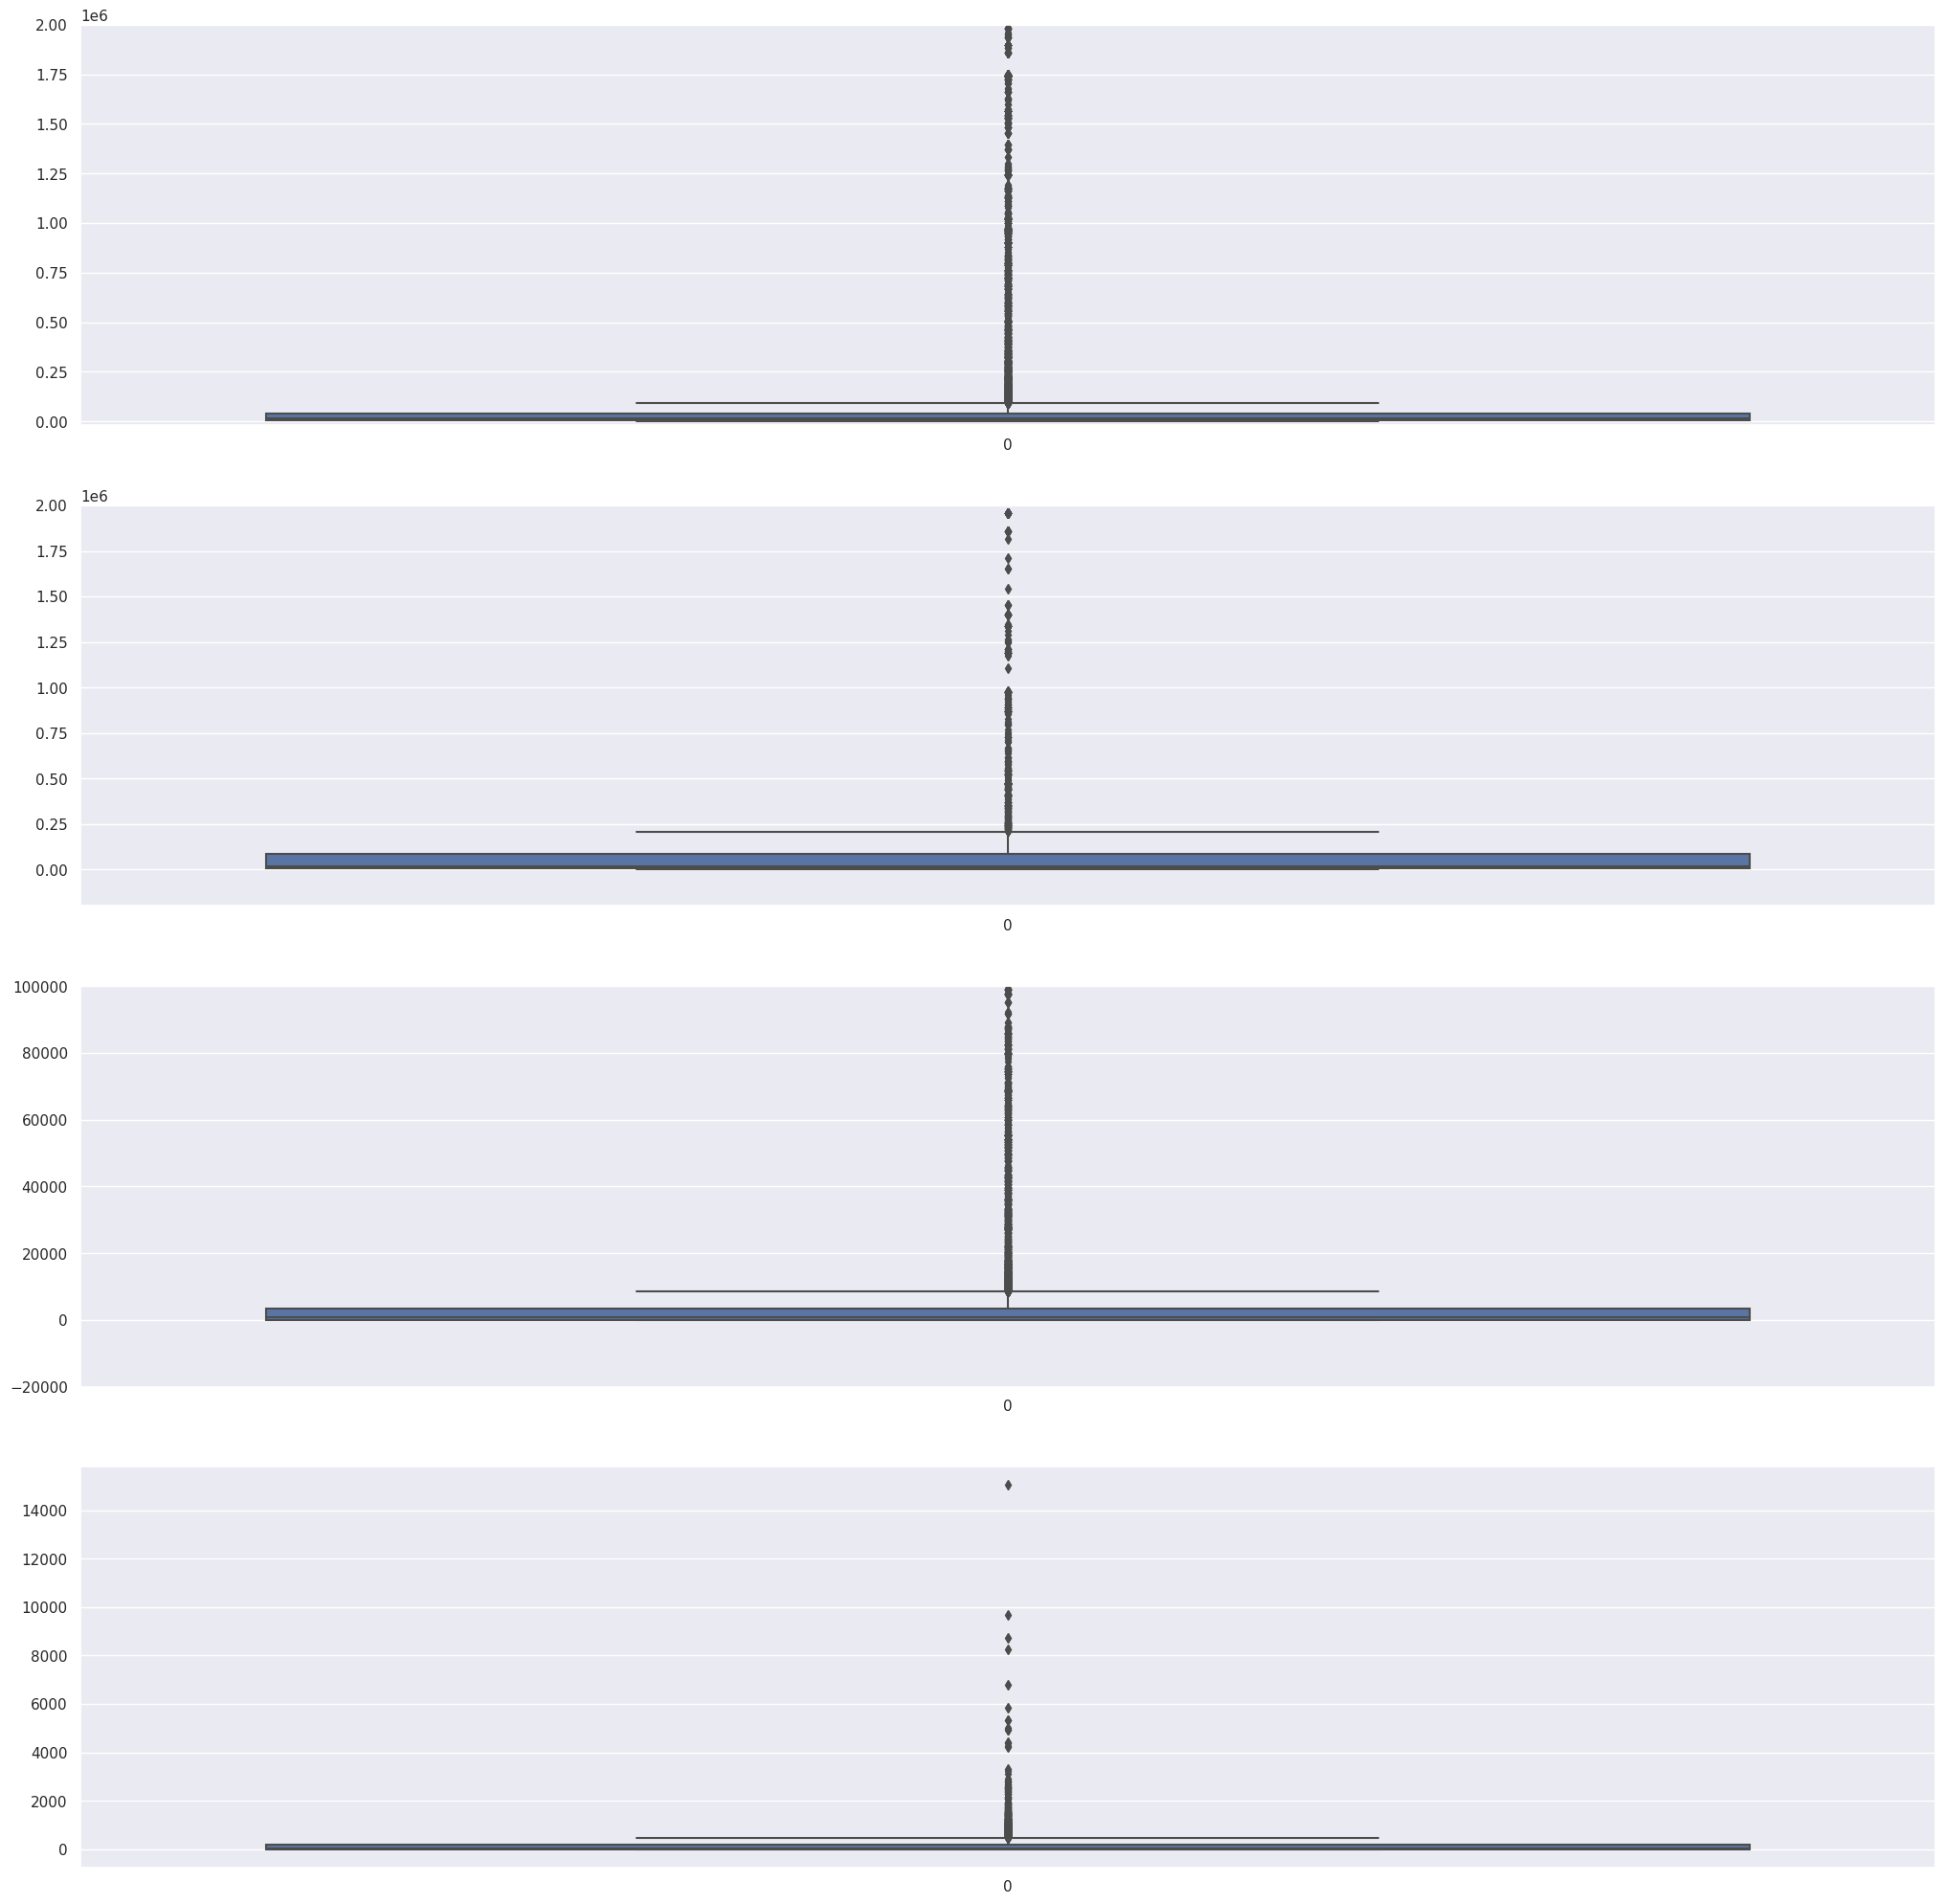

In [20]:
fig, axs = plt.subplots(nrows=4, figsize=(25,25))

sns.boxplot(consumption["cons_12m"], ax = axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax = axs[1])
sns.boxplot(consumption["cons_last_month"], ax = axs[2])
sns.boxplot(consumption["imp_cons"], ax = axs[3])

for ax in axs:
    #ax.ticklabel_format(style="plain", axis="x")

    axs[0].set_xlim(-20_000, 2_000_000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)

plt.show()

In [9]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [11]:
forecast = client_df[
["id", "forecast_cons_12m",
"forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
"forecast_price_energy_off_peak","forecast_price_energy_peak",
"forecast_price_pow_off_peak","churn"
]
]

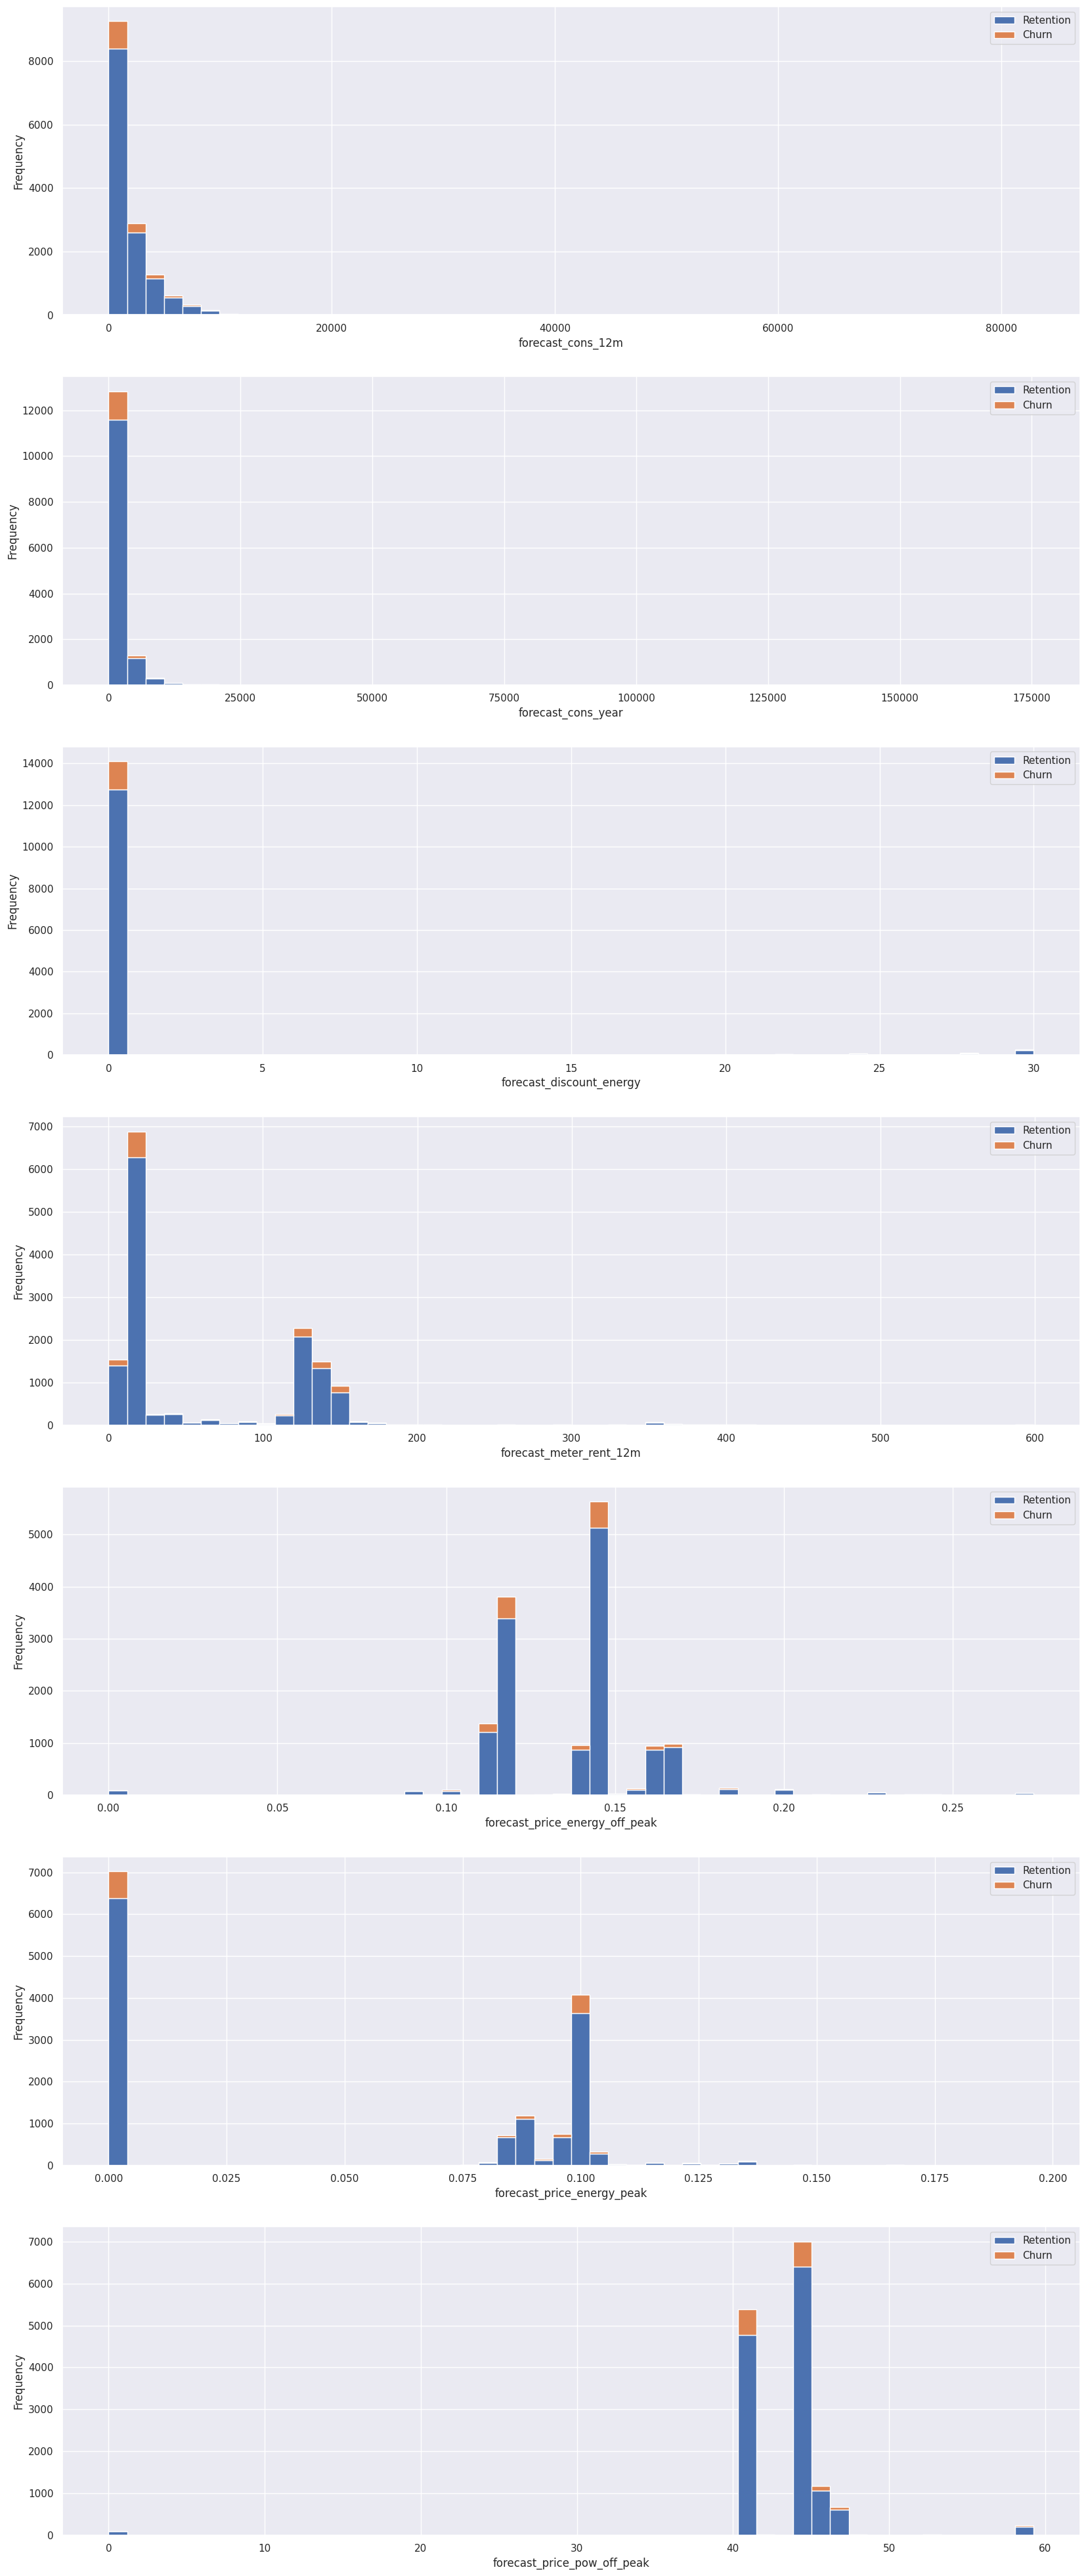

In [16]:
fig, axs = plt.subplots(nrows = 7, figsize=(20,50))

# plot
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

## Client Type

In [37]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [21]:
client_type = client_df[["id", "has_gas", "churn"]]
client = client_type.groupby([client_type["churn"], client_type["has_gas"]])["id"].count().unstack(level = 0)
client_pct = (client.div(client.sum(axis =1), axis = 0) * 100).sort_values(by=[1])

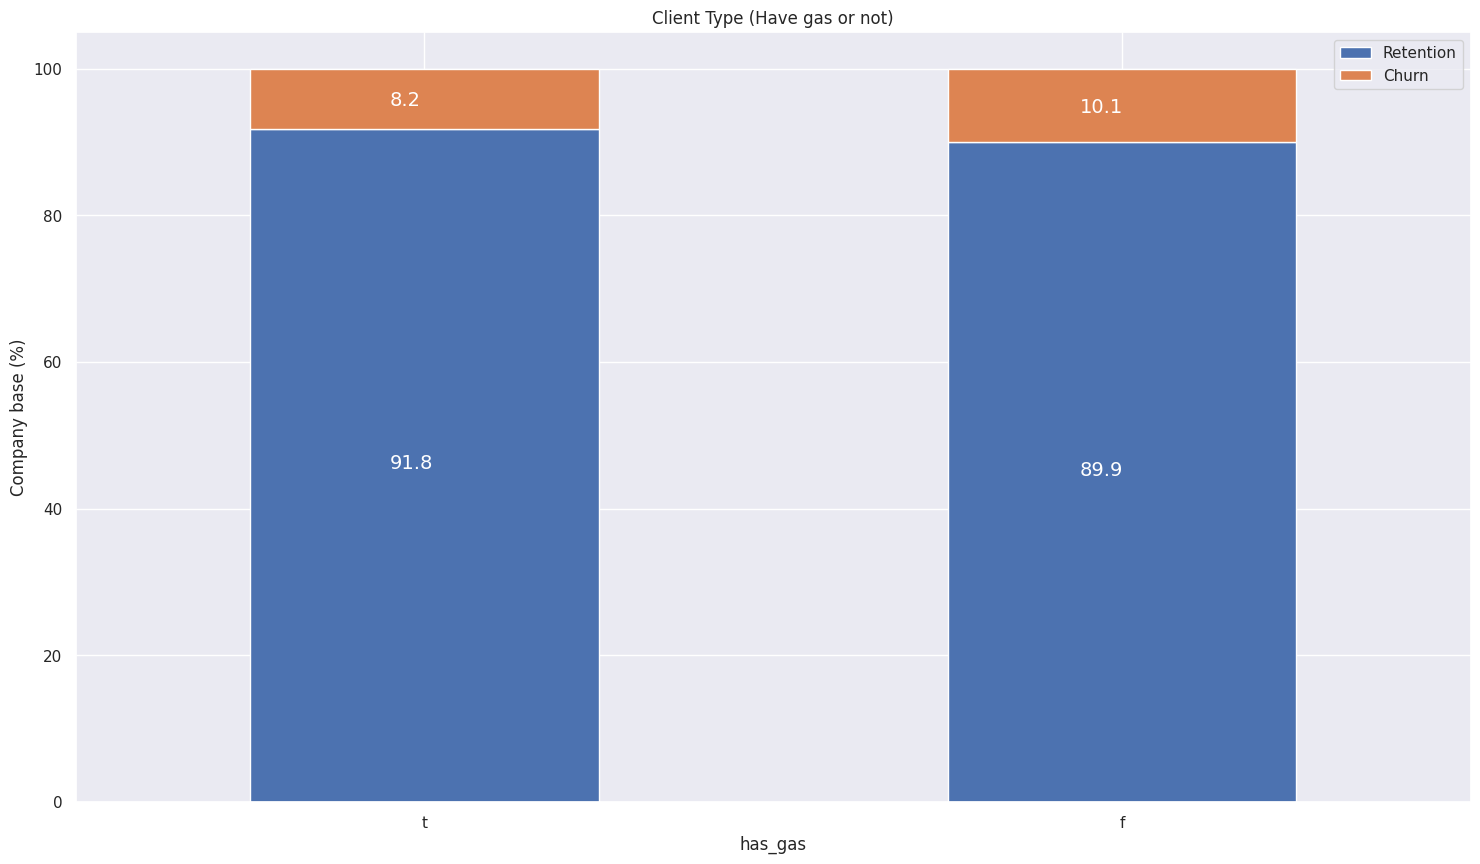

In [22]:
plot_stacked_bars(client_pct, "Client Type (Have gas or not)")

In [30]:
power = client_df[["id", "pow_max", "churn"]]

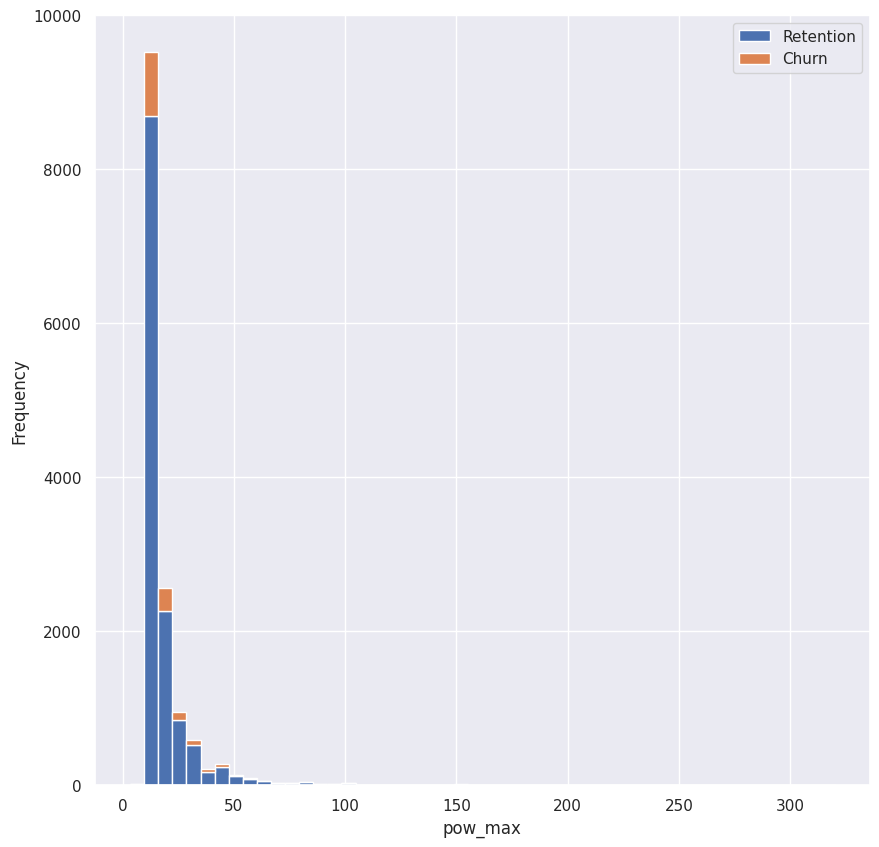

In [38]:
fig, ax = plt.subplots(nrows=1, figsize = (10,10))
plot_distribution(power, 'pow_max', ax)

In [42]:
antig_years = client_df[["id", "num_years_antig", "churn"]]
antig = antig_years.groupby([antig_years["num_years_antig"], antig_years["churn"]])["id"].count().unstack(level=1)
antig_pct = (antig.div(antig.sum(axis=1), axis=0) * 100)

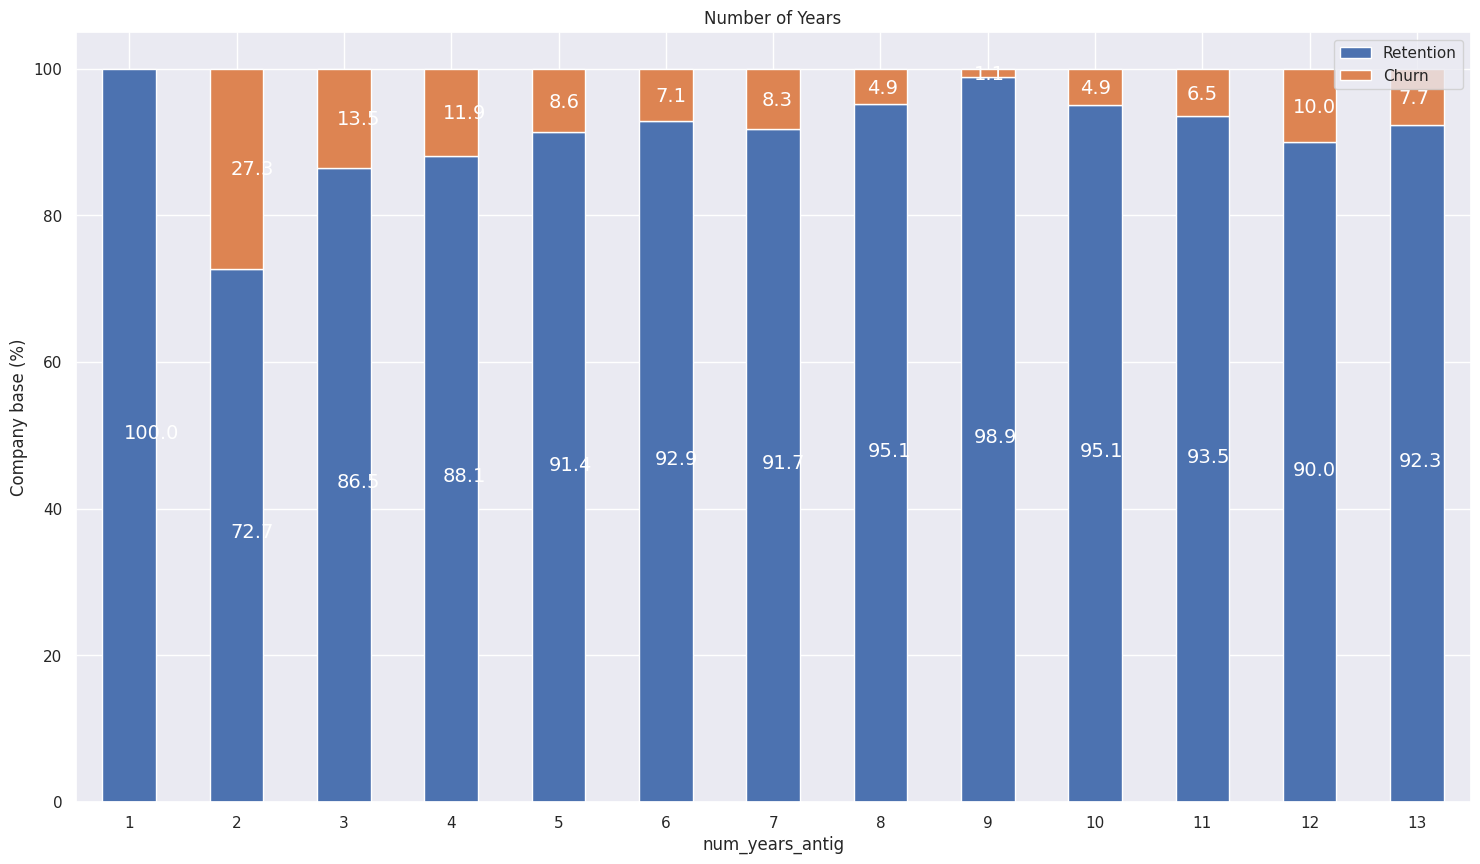

In [43]:
plot_stacked_bars(antig_pct, "Number of Years")

In [5]:
 # Transform date columns to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"],format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"],format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"],format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date']
,format='%Y-%m-%d')

In [6]:
var_year = price_df.groupby(["id", "price_date"]).mean().groupby(['id']).var().reset_index()

In [7]:
var_6m = price_df[price_df["price_date"] > "2015-06-01"].groupby(["id", "price_date"]).mean().groupby(["id"]).var().reset_index()

In [8]:
var_year.columns

Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [9]:
var_year = var_year.rename(columns = {
"price_off_peak_var": "var_year_price_p1_var",
"price_peak_var": "var_year_price_p2_var",
"price_mid_peak_var": "var_year_price_p3_var",
"price_off_peak_fix": "var_year_price_p1_fix",
"price_peak_fix": "var_year_price_p2_fix",
"price_mid_peak_fix": "var_year_price_p3_fix"
})

var_year["var_year_price_p1"] = var_year["var_year_price_p1_var"] + var_year["var_year_price_p1_fix"]
var_year["var_year_price_p2"] = var_year["var_year_price_p2_var"] + var_year["var_year_price_p2_fix"]
var_year["var_year_price_p3"] = var_year["var_year_price_p3_var"] + var_year["var_year_price_p3_fix"]

In [10]:
var_6m = var_6m.rename(columns = {
"price_off_peak_var": "var_6m_price_p1_var",
"price_peak_var": "var_6m_price_p2_var",
"price_mid_peak_var": "var_6m_price_p3_var",
"price_off_peak_fix": "var_6m_price_p1_fix",
"price_peak_fix": "var_6m_price_p2_fix",
"price_mid_peak_fix": "var_6m_price_p3_fix"
} )

var_6m["var_6m_price_p1"] = var_6m["var_6m_price_p1_var"] + var_6m["var_6m_price_p1_fix"]
var_6m["var_6m_price_p2"] = var_6m["var_6m_price_p2_var"] + var_6m["var_6m_price_p2_fix"]
var_6m["var_6m_price_p3"] = var_6m["var_6m_price_p3_var"] + var_6m["var_6m_price_p3_fix"]

In [11]:
price_features = pd.merge(var_year, var_6m, on = 'id')

In [12]:
price_features.head()

id  var_year_price_p1_var  \
0  0002203ffbb812588b632b9e628cc38d               0.000016   
1  0004351ebdd665e6ee664792efc4fd13               0.000005   
2  0010bcc39e42b3c2131ed2ce55246e3c               0.000676   
3  0010ee3855fdea87602a5b7aba8e42de               0.000025   
4  00114d74e963e47177db89bc70108537               0.000005   

   var_year_price_p2_var  var_year_price_p3_var  var_year_price_p1_fix  \
0               0.000004           1.871602e-06           4.021438e-03   
1               0.000000           0.000000e+00           7.661891e-03   
2               0.000000           0.000000e+00           5.965909e-01   
3               0.000007           1.627620e-07           7.238536e-03   
4               0.000000           0.000000e+00           3.490909e-13   

   var_year_price_p2_fix  var_year_price_p3_fix  var_year_price_p1  \
0               0.001448               0.000643           0.004037   
1               0.000000               0.000000           0.007667   
2               0.000000               0.000000           0.597267   
3               0.002606               0.001158           0.007264   
4               0.000000               0.000000           0.000005   

   var_year_price_p2  var_year_price_p3  var_6m_price_p1_var  \
0           0.001452           0.000645             0.000011   
1           0.000000           0.000000             0.000003   
2           0.000000           0.000000             0.000003   
3           0.002613           0.001158             0.000011   
4           0.000000           0.000000             0.000003   

   var_6m_price_p2_var  var_6m_price_p3_var  var_6m_price_p1_fix  \
0             0.000003         4.860000e-10                  0.0   
1             0.000000         0.000000e+00                  0.0   
2             0.000000         0.000000e+00                  0.0   
3             0.000003         4.860000e-10                  0.0   
4             0.000000         0.000000e+00                  0.0   

   var_6m_price_p2_fix  var_6m_price_p3_fix  var_6m_price_p1  var_6m_price_p2  \
0                  0.0                  0.0         0.000011         0.000003   
1                  0.0                  0.0         0.000003         0.000000   
2                  0.0                  0.0         0.000003         0.000000   
3                  0.0                  0.0         0.000011         0.000003   
4                  0.0                  0.0         0.000003         0.000000   

   var_6m_price_p3  
0     4.860000e-10  
1     0.000000e+00  
2     0.000000e+00  
3     4.860000e-10  
4     0.000000e+00

In [13]:
price_analysis = pd.merge(price_features, client_df[["id", "churn"]], on = "id")
price_analysis.head()

id  var_year_price_p1_var  \
0  0002203ffbb812588b632b9e628cc38d               0.000016   
1  0004351ebdd665e6ee664792efc4fd13               0.000005   
2  0010bcc39e42b3c2131ed2ce55246e3c               0.000676   
3  00114d74e963e47177db89bc70108537               0.000005   
4  0013f326a839a2f6ad87a1859952d227               0.000016   

   var_year_price_p2_var  var_year_price_p3_var  var_year_price_p1_fix  \
0               0.000004               0.000002           4.021438e-03   
1               0.000000               0.000000           7.661891e-03   
2               0.000000               0.000000           5.965909e-01   
3               0.000000               0.000000           3.490909e-13   
4               0.000004               0.000002           0.000000e+00   

   var_year_price_p2_fix  var_year_price_p3_fix  var_year_price_p1  \
0               0.001448               0.000643           0.004037   
1               0.000000               0.000000           0.007667   
2               0.000000               0.000000           0.597267   
3               0.000000               0.000000           0.000005   
4               0.000000               0.000000           0.000016   

   var_year_price_p2  var_year_price_p3  var_6m_price_p1_var  \
0           0.001452           0.000645             0.000011   
1           0.000000           0.000000             0.000003   
2           0.000000           0.000000             0.000003   
3           0.000000           0.000000             0.000003   
4           0.000004           0.000002             0.000011   

   var_6m_price_p2_var  var_6m_price_p3_var  var_6m_price_p1_fix  \
0             0.000003         4.860000e-10                  0.0   
1             0.000000         0.000000e+00                  0.0   
2             0.000000         0.000000e+00                  0.0   
3             0.000000         0.000000e+00                  0.0   
4             0.000003         4.860000e-10                  0.0   

   var_6m_price_p2_fix  var_6m_price_p3_fix  var_6m_price_p1  var_6m_price_p2  \
0                  0.0                  0.0         0.000011         0.000003   
1                  0.0                  0.0         0.000003         0.000000   
2                  0.0                  0.0         0.000003         0.000000   
3                  0.0                  0.0         0.000003         0.000000   
4                  0.0                  0.0         0.000011         0.000003   

   var_6m_price_p3  churn  
0     4.860000e-10      0  
1     0.000000e+00      0  
2     0.000000e+00      0  
3     0.000000e+00      0  
4     4.860000e-10      0

/tmp/ipykernel_35/1103815713.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_analysis.corr()


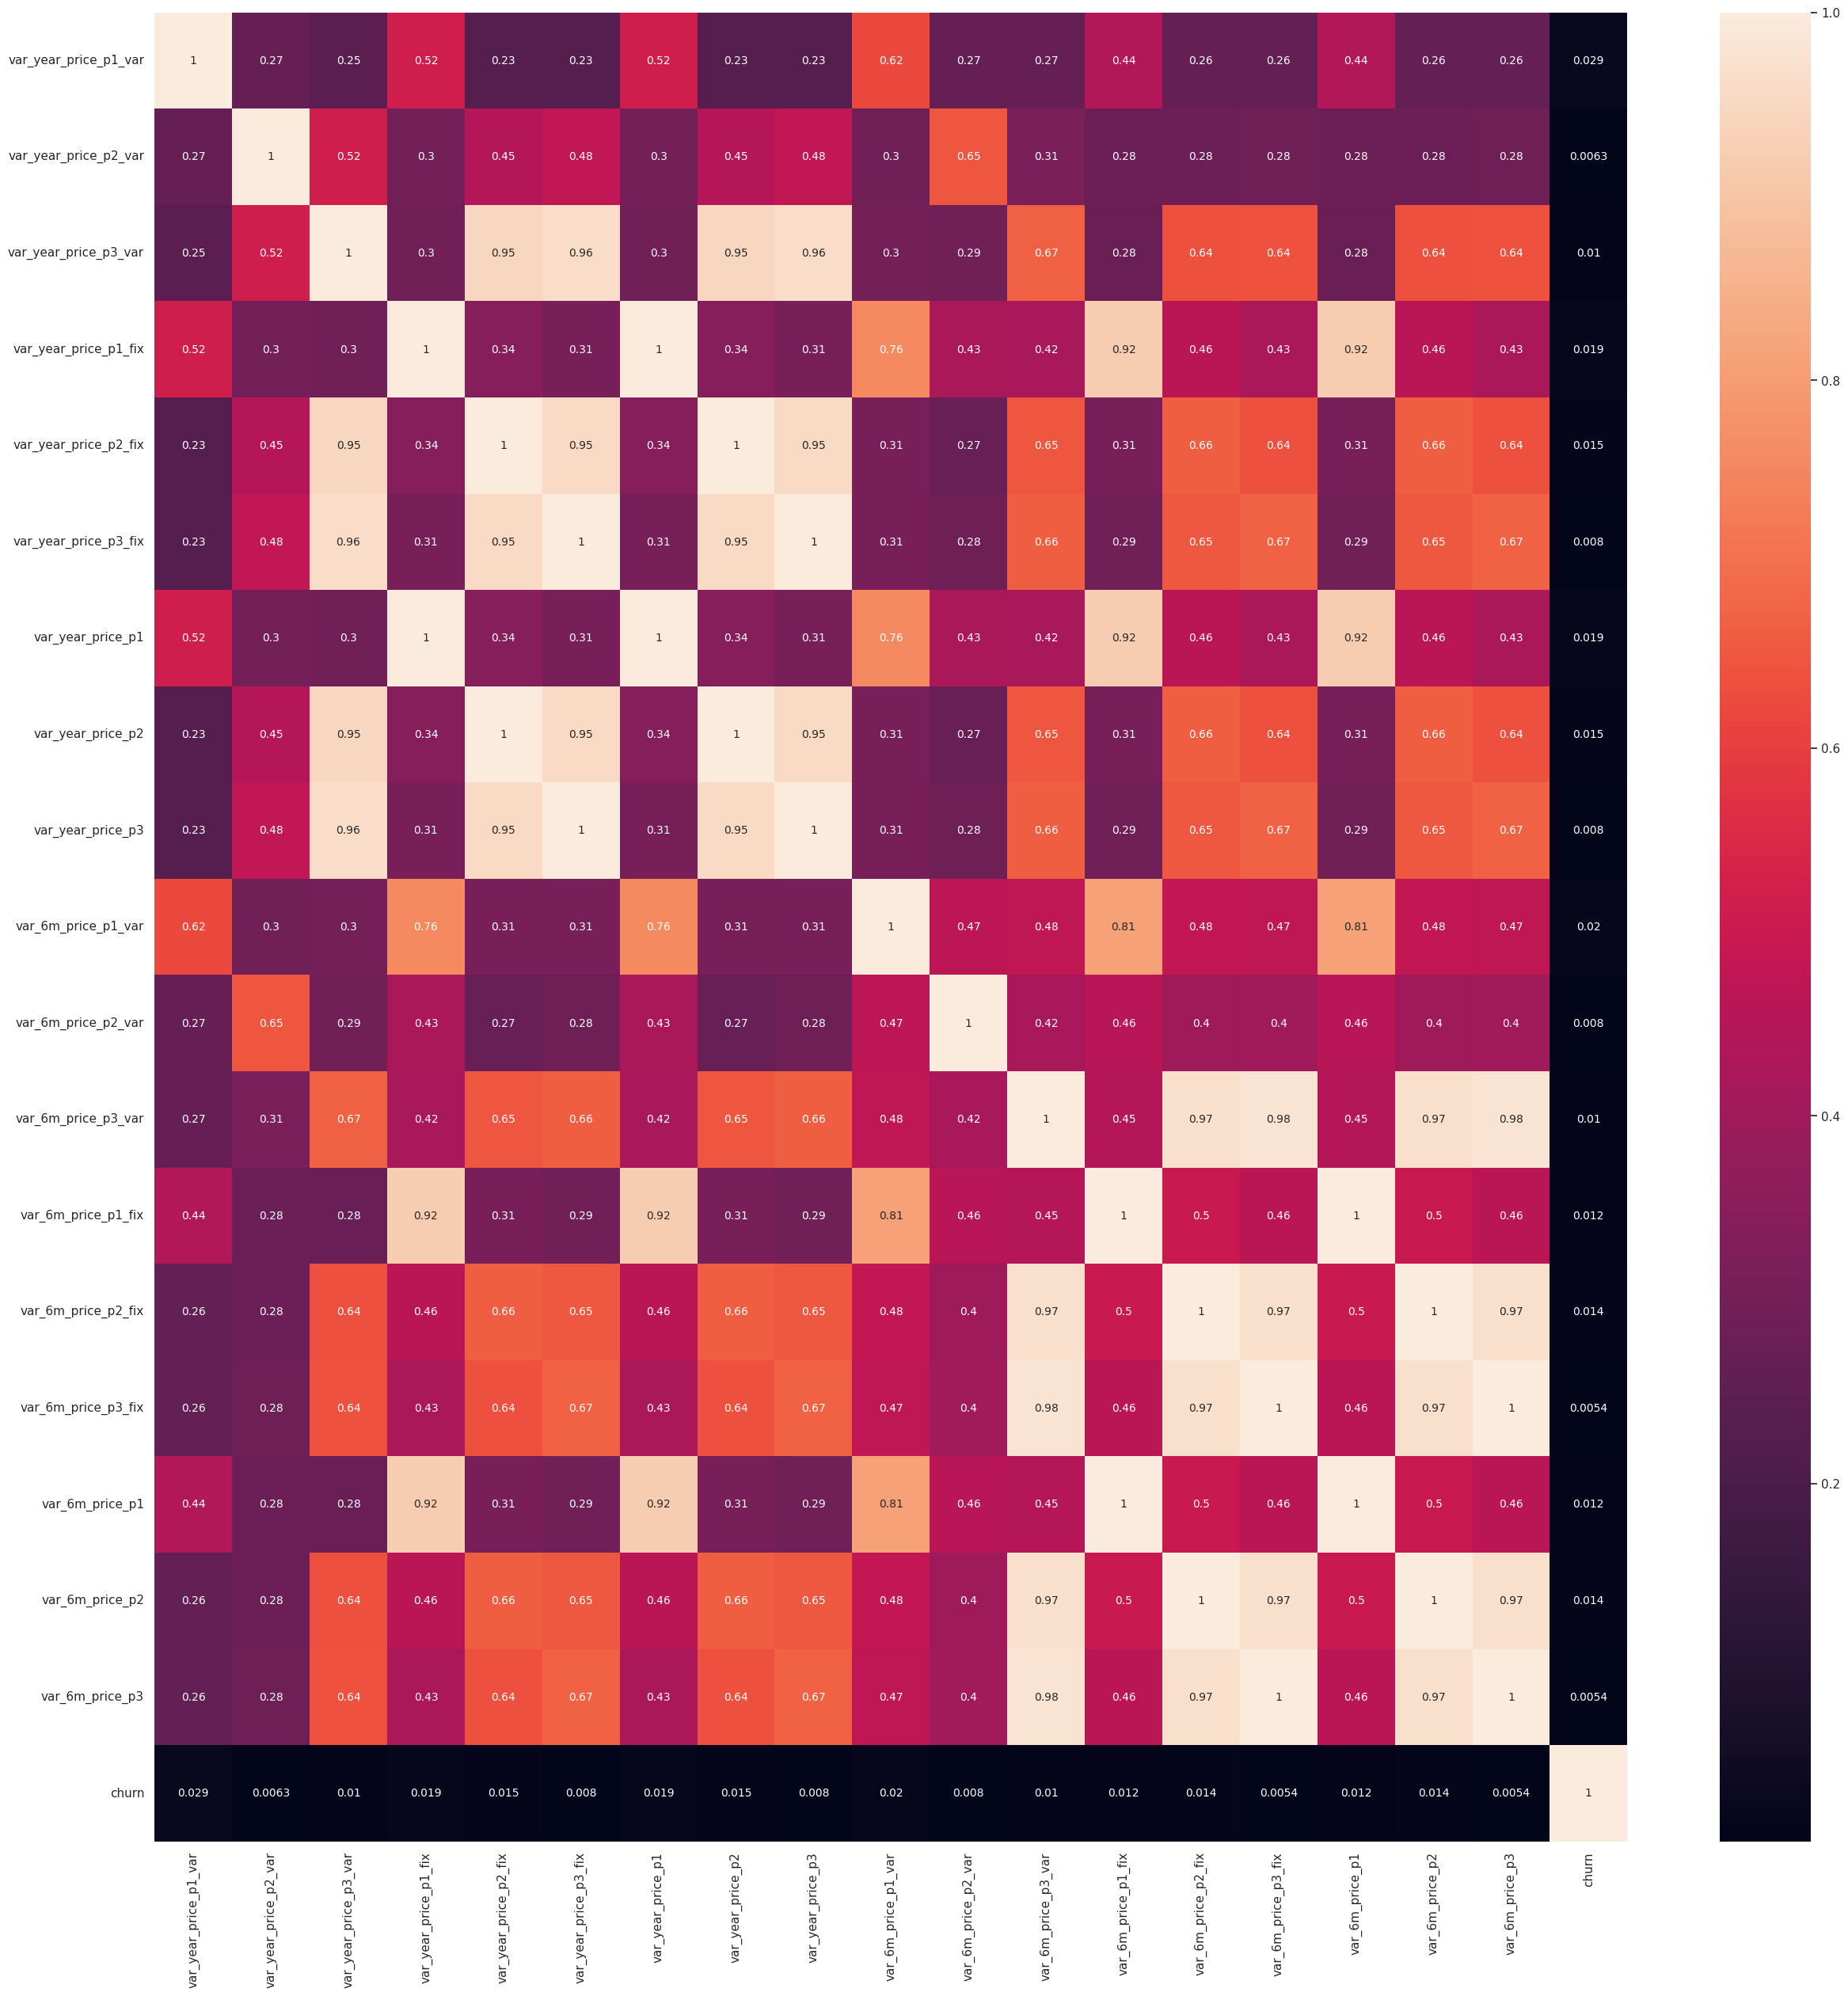

In [74]:
corr = price_analysis.corr()

plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, annot_kws={'size':10})
plt.show()

In [14]:
merged_data = pd.merge(client_df.drop(columns=["churn"]), price_analysis, on ="id" )
merged_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_p1_var  \
0      2015-11-01   2015-06-23               0.00  ...             0.000131   
1      2009-08-21   2015-08-31             189.95  ...             0.000003   
2      2010-04-16   2015-04-17              47.96  ...             0.000004   
3      2010-03-30   2015-03-31             240.04  ...             0.000003   
4      2010-01-13   2015-03-09             445.75  ...             0.000011   

   var_6m_price_p2_var  var_6m_price_p3_var  var_6m_price_p1_fix  \
0         4.100838e-05         9.084737e-04             2.086294   
1         1.217891e-03         0.000000e+00             0.009482   
2         9.450150e-08         0.000000e+00             0.000000   
3         0.000000e+00         0.000000e+00             0.000000   
4         2.896760e-06         4.860000e-10             0.000000   

   var_6m_price_p2_fix  var_6m_price_p3_fix var_6m_price_p1  var_6m_price_p2  \
0            99.530517            44.235794        2.086425     9.953056e+01   
1             0.000000             0.000000        0.009485     1.217891e-03   
2             0.000000             0.000000        0.000004     9.450150e-08   
3             0.000000             0.000000        0.000003     0.000000e+00   
4             0.000000             0.000000        0.000011     2.896760e-06   

   var_6m_price_p3  churn  
0     4.423670e+01      1  
1     0.000000e+00      0  
2     0.000000e+00      0  
3     0.000000e+00      0  
4     4.860000e-10      0  

[5 rows x 44 columns]

In [15]:
merged_data.to_csv("clean_data.csv")

# Feature Engineering 

- Feature Recommended:
### "Difference between off-peak prices in December and preceding January"

In [93]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [94]:
import numpy as np
import datetime as dt

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [204]:
df = pd.read_csv("/kaggle/working/clean_data.csv", parse_dates = True )
df["date_activ"] = pd.to_datetime(df["date_activ"], format = "%Y-%m-%d")
df["date_end"] = pd.to_datetime(df["date_end"], format = "%Y-%m-%d")
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format = "%Y-%m-%d")
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format = "%Y-%m-%d")

In [205]:
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   var_6m_price_p1_var  var_6m_price_p2_var  var_6m_price_p3_var  \
0             0.000131         4.100838e-05         9.084737e-04   
1             0.000003         1.217891e-03         0.000000e+00   
2             0.000004         9.450150e-08         0.000000e+00   
3             0.000003         0.000000e+00         0.000000e+00   
4             0.000011         2.896760e-06         4.860000e-10   

   var_6m_price_p1_fix  var_6m_price_p2_fix  var_6m_price_p3_fix  \
0             2.086294            99.530517            44.235794   
1             0.009482             0.000000             0.000000   
2             0.000000             0.000000             0.000000   
3             0.000000             0.000000             0.000000   
4             0.000000             0.000000             0.000000   

   var_6m_price_p1 var_6m_price_p2  var_6m_price_p3  churn  
0         2.086425    9.953056e+01     4.423670e+01      1  
1         0.009485    1.217891e-03     0.000000e+00      0  
2         0.000004    9.450150e-08     0.000000e+00      0  
3         0.000003    0.000000e+00     0.000000e+00      0  
4         0.000011    2.896760e-06     4.860000e-10      0  

[5 rows x 45 columns]

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      14606 non-null  int64         
 1   id                              14606 non-null  object        
 2   channel_sales                   14606 non-null  object        
 3   cons_12m                        14606 non-null  int64         
 4   cons_gas_12m                    14606 non-null  int64         
 5   cons_last_month                 14606 non-null  int64         
 6   date_activ                      14606 non-null  datetime64[ns]
 7   date_end                        14606 non-null  datetime64[ns]
 8   date_modif_prod                 14606 non-null  datetime64[ns]
 9   date_renewal                    14606 non-null  datetime64[ns]
 10  forecast_cons_12m               14606 non-null  float64       
 11  fo

In [207]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format = "%y-%m-%d")
price_df.tail()

id price_date  price_off_peak_var  \
192997  16f51cdc2baa19af0b940ee1b3dd17d5 2015-08-01            0.119916   
192998  16f51cdc2baa19af0b940ee1b3dd17d5 2015-09-01            0.119916   
192999  16f51cdc2baa19af0b940ee1b3dd17d5 2015-10-01            0.119916   
193000  16f51cdc2baa19af0b940ee1b3dd17d5 2015-11-01            0.119916   
193001  16f51cdc2baa19af0b940ee1b3dd17d5 2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  
192997        24.43733           16.291555  
192998        24.43733           16.291555  
192999        24.43733           16.291555  
193000        24.43733           16.291555  
193001        24.43733           16.291555

In [208]:
#Grouping off-peak prices by month and companies 
monthly_prices_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var' : 'mean', 'price_off_peak_fix' : 'mean'}).reset_index()

In [209]:
#Get Jan and Dec prices
jan_prices = monthly_prices_by_id.groupby("id").first().reset_index()
dec_prices = monthly_prices_by_id.groupby("id").last().reset_index()

In [210]:
# Calculating the difference 
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var' : 'dec_1', 'price_off_peak_fix' : 'dec_2'}) , 
               jan_prices.drop(columns = 'price_date'), on = 'id')
diff["offpeak_diff_dec_jan_energy"] = diff["dec_1"] - diff["price_off_peak_var"]
diff["offpeak_diff_dec_jan_power"] = diff["dec_2"] - diff["price_off_peak_fix"]
diff = diff[['id', 'offpeak_diff_dec_jan_energy', 'offpeak_diff_dec_jan_power']]
diff.head()

id  offpeak_diff_dec_jan_energy  \
0  0002203ffbb812588b632b9e628cc38d                    -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                    -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                     0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                    -0.010018   
4  00114d74e963e47177db89bc70108537                    -0.003994   

   offpeak_diff_dec_jan_power  
0                    0.162916  
1                    0.177779  
2                    1.500000  
3                    0.162916  
4                   -0.000001

In [211]:
df = pd.merge(df, diff, on = 'id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   var_6m_price_p3_var  var_6m_price_p1_fix  var_6m_price_p2_fix  \
0         9.084737e-04             2.086294            99.530517   
1         0.000000e+00             0.009482             0.000000   
2         0.000000e+00             0.000000             0.000000   
3         0.000000e+00             0.000000             0.000000   
4         4.860000e-10             0.000000             0.000000   

   var_6m_price_p3_fix  var_6m_price_p1  var_6m_price_p2  var_6m_price_p3  \
0            44.235794         2.086425     9.953056e+01     4.423670e+01   
1             0.000000         0.009485     1.217891e-03     0.000000e+00   
2             0.000000         0.000004     9.450150e-08     0.000000e+00   
3             0.000000         0.000003     0.000000e+00     0.000000e+00   
4             0.000000         0.000011     2.896760e-06     4.860000e-10   

  churn  offpeak_diff_dec_jan_energy  offpeak_diff_dec_jan_power  
0     1                     0.020057                    3.700961  
1     0                    -0.003767                    0.177779  
2     0                    -0.004670                    0.177779  
3     0                    -0.004547                    0.177779  
4     0                    -0.006192                    0.162916  

[5 rows x 47 columns]

In [212]:
df.to_csv("Current.csv")

### Average Price change across periods
Calculating average price changes across individual periods, instead of the entire year.

In [213]:
mean_prices = price_df.groupby(['id']).agg({
'price_off_peak_var': 'mean',
'price_peak_var': 'mean',
'price_mid_peak_var': 'mean',
'price_off_peak_fix': 'mean',
'price_peak_fix': 'mean',
'price_mid_peak_fix': 'mean'
})

In [214]:
# Calculate the mean differences between consecutive periods 
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices["price_off_peak_var"] - mean_prices["price_peak_var"]
mean_prices["peak_mid_peak_var_mean_diff"] = mean_prices["price_peak_var"] - mean_prices["price_mid_peak_var"]
mean_prices["off_peak_mid_peak_var_mean_diff"] = mean_prices["price_off_peak_var"] - mean_prices["price_mid_peak_var"]
mean_prices["off_peak_peak_fix_mean_diff"] = mean_prices["price_off_peak_fix"] - mean_prices["price_peak_fix"]
mean_prices["peak_mid_peak_fix_mean_diff"] = mean_prices["price_peak_fix"] - mean_prices["price_mid_peak_fix"]
mean_prices["off_peak_mid_peak_fix_mean_diff"] = mean_prices["price_off_peak_fix"] - mean_prices["price_mid_peak_fix"]

In [215]:
mean_prices.reset_index(inplace=True)

In [216]:
columns = [
'id',
'off_peak_peak_var_mean_diff',
'peak_mid_peak_var_mean_diff',
'off_peak_mid_peak_var_mean_diff',
'off_peak_peak_fix_mean_diff',
'peak_mid_peak_fix_mean_diff',
'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on = 'id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  var_6m_price_p3  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...     4.423670e+01   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...     0.000000e+00   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...     0.000000e+00   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...     0.000000e+00   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...     4.860000e-10   

   churn  offpeak_diff_dec_jan_energy  offpeak_diff_dec_jan_power  \
0      1                     0.020057                    3.700961   
1      0                    -0.003767                    0.177779   
2      0                    -0.004670                    0.177779   
3      0                    -0.004547                    0.177779   
4      0                    -0.006192                    0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

   off_peak_mid_peak_var_mean_diff off_peak_peak_fix_mean_diff  \
0                         0.058257                   18.590255   
1                         0.149609                   44.311375   
2                         0.170512                   44.385450   
3                         0.151210                   44.400265   
4                         0.051309                   16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 53 columns]

Thre is more granularity to the existing data that by looking at avg. change in price across different time periods.

### Max price changes across period and months 
- Looking at the max change in price across periods to enahnce the features

In [217]:
# Aggregate average price per period by company 
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
'price_off_peak_var': 'mean',
'price_peak_var': 'mean',
'price_mid_peak_var': 'mean',
'price_off_peak_fix': 'mean',
'price_peak_fix': 'mean',
'price_mid_peak_fix': 'mean'
}).reset_index()

In [218]:
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - \
mean_prices_by_month['price_peak_var']

mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - \
mean_prices_by_month['price_mid_peak_var']

mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - \
mean_prices_by_month['price_mid_peak_var']

mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - \
mean_prices_by_month['price_peak_fix']

mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - \
mean_prices_by_month['price_mid_peak_fix']

mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - \
mean_prices_by_month['price_mid_peak_fix']

In [219]:
# Calculate the max monthly difference across time periods 

max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
'off_peak_peak_var_mean_diff': 'max',
'peak_mid_peak_var_mean_diff': 'max',
'off_peak_mid_peak_var_mean_diff': 'max',
'off_peak_peak_fix_mean_diff': 'max',
'peak_mid_peak_fix_mean_diff': 'max',
'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns = {
'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
'off_peak_mid_peak_fix_mean_diff':'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [220]:
columns = [
'id',
'off_peak_peak_var_max_monthly_diff',
'peak_mid_peak_var_max_monthly_diff',
'off_peak_mid_peak_var_max_monthly_diff',
'off_peak_peak_fix_max_monthly_diff',
'peak_mid_peak_fix_max_monthly_diff',
'off_peak_mid_peak_fix_max_monthly_diff'
]

In [221]:
df = pd.merge(df, max_diff_across_periods_months[columns], on = 'id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.151367                          44.444710   
2                                0.172468                          44.444710   
3                                0.153133                          44.444710   
4                                0.055866                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 59 columns]

Tracking the price change over different time periods is important since need to think like the client of the copmany and clients would not like a sudden price hike between months or sudden change in price over a short time span. Sudden price changes may push clients to look for alternative utilities providers for a better deal. These are probably important features when predicting churn. 

### Client retention

In [222]:
df['tenure'] = ((df['date_end'] - df['date_activ'] ) / np.timedelta64(1, 'Y') ).astype(int)

In [223]:
df.groupby(['tenure']).agg({'churn' : 'mean' }).sort_values(by = 'churn', ascending = False)

churn
tenure          
3       0.143713
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

There is a higher churn rate for companies that have been a client for less than 4 or less months are most likely to churn. At 5 months there is a 4 % drop in churn indicating that past 4 months is likely important to keeping a customer. 

- `months_activ` is the Number of months active until reference date
- `months_to_end` is the Number of months of the contract left untill reference date
- `months_modif_prod` Number of months since last modification until reference date
- `motnhs_renewal` Number of months since last renewal until ref date.

In [224]:
def convert_to_months(reference, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [225]:
# Create reference date
reference_date = dt.datetime(2016, 1, 1)

# Columns
df['months_activ'] = convert_to_months(reference_date, df, 'date_activ')
df['months_to_end'] = convert_to_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_to_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_to_months(reference_date, df, 'date_renewal')

In [226]:
# Removing the datetime 
remove = [
'date_activ',
'date_end',
'date_modif_prod',
'date_renewal'
]
df = df.drop(columns=remove)
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  ...  peak_mid_peak_var_max_monthly_diff  \
0                     1.78  ...                            0.085483   
1                    16.27  ...                            0.085483   
2                    38.72  ...                            0.089162   
3                    19.83  ...                            0.000000   
4                   131.73  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                           44.266930   
1                                0.151367                           44.444710   
2                                0.172468                           44.444710   
3                                0.153133                           44.444710   
4                                0.055866                           16.291555   

  peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                           8.145775                                44.26693   
1                           0.000000                                44.44471   
2                           0.000000                                44.44471   
3                           0.000000                                44.44471   
4                           8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  
0       3            30             -5                  2               6  
1       7            76             -7                 76               4  
2       6            68             -3                 68               8  
3       6            69             -2                 69               9  
4       6            71             -2                 71               9  

[5 rows x 60 columns]

In [227]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1,0])
df.groupby(['has_gas']).agg({'churn' : 'mean'})

churn
has_gas          
0        0.100544
1        0.081856

**Clients who do not buy gas are 2% more likely to churn**

### Transforming Categorical data

- The models cannot accept categories or `strings` values, so they need to encod categorical features with numerical representations. 
- Can use label encoding to map an integer however it introduces the concept of order into a feature which may not be true for the data. 
- Can also use dummy variables, `One-hot-encoding`, to create new features for each unique value and filling the column with 1 or 0 to indicate if it's true or not.

In [228]:
df['channel_sales'] = df['channel_sales'].astype('category')
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [229]:
df = pd.get_dummies(df, columns = ['channel_sales'], prefix = 'channel' )
df = df.drop(columns = ["channel_sddiedcslfslkckwlfkdpoeeailfpeds", "channel_epumfxlbckeskwekxbiuasklxalciiuu",
                       "channel_fixdbufsefwooaasfcxdxadsiekoceaa"])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57         0         54946   
1           1  d29c2c54acc38ff3c0614d0a653813dd      4660             0   
2           2  764c75f661154dac3a6c254cd082ea7d       544             0   
3           3  bba03439a292a1e166f80264c16191cb      1584             0   
4           4  149d57cf92fc41cf94415803a877cb4b      4425             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0               0.00                   0   
1                0             189.95                   0   
2                0              47.96                   0   
3                0             240.04                   0   
4              526             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  tenure  months_activ  months_to_end  \
0                        0.114481  ...       3            30             -5   
1                        0.145711  ...       7            76             -7   
2                        0.165794  ...       6            68             -3   
3                        0.146694  ...       6            69             -2   
4                        0.116900  ...       6            71             -2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                 76               4                1   
2                 68               8                0   
3                 69               9                0   
4                 71               9                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

  channel_usilxuppasemubllopkaafesmlibmsdf  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 64 columns]

In [121]:
# Categorizing 'origin_up'
df['origin_up'] = df['origin_up'].astype('category')

# Categories Count
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [232]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.000000  ...                 76               4   
2                    0.087899  ...                 68               8   
3                    0.000000  ...                 69               9   
4                    0.100015  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 65 columns]

### Transforming numerical data

- Need to treat skewness is because some predictive models have inherent assumptions about the distributions of the features, such models are called `parametric models`, these models assume that all features are both independent and normally distributed. 
- Although *skewness* isn't always a bad thing it's a good rule of thumb to treat highly skewed variables b/c of model assumptions and it can improve the speed at which the model converges. 

- Possible transformations that can applied to a continous numeric column: `Square root`, `Cubic root`, `Logarithm`, the dsitribution will change here the `Logarithm` transformation is applied for positively skewed data. 



In [233]:
skewed = [
'cons_12m',
'cons_gas_12m',
'cons_last_month',
'forecast_cons_12m',
'forecast_cons_year',
'forecast_discount_energy',
'forecast_meter_rent_12m',
'forecast_price_energy_off_peak',
'forecast_price_energy_peak',
'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [234]:
# Applying Log10 transformations , Adding 1 because log(0) cannot be applied 
df['cons_12m'] = np.log10(df['cons_12m'] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [235]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Standard deviation of the features is much lower after the log10-transformation. It makes the feature more stable and predictable 

In [236]:
df.to_csv("Current.csv")

Checking the distribution of some of the features 

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


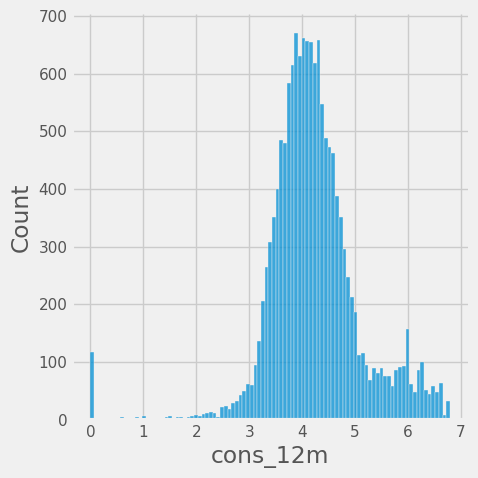

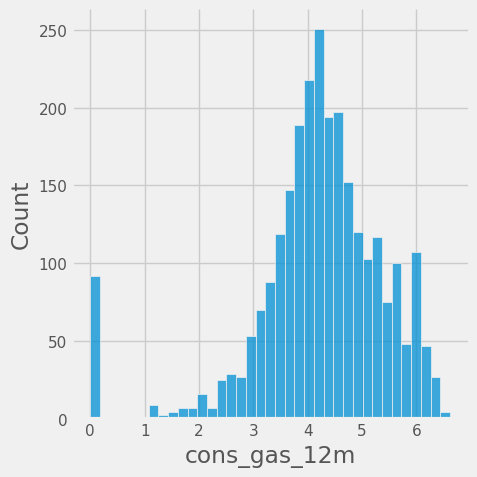

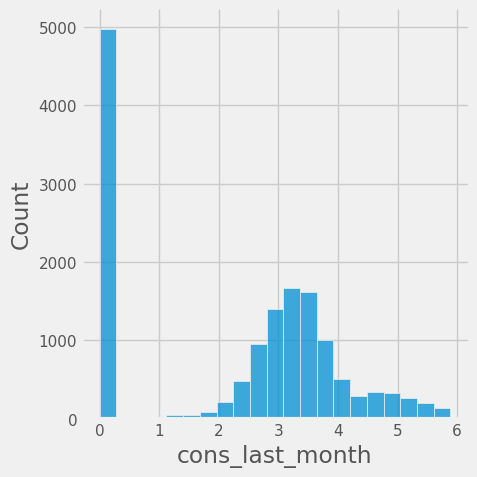

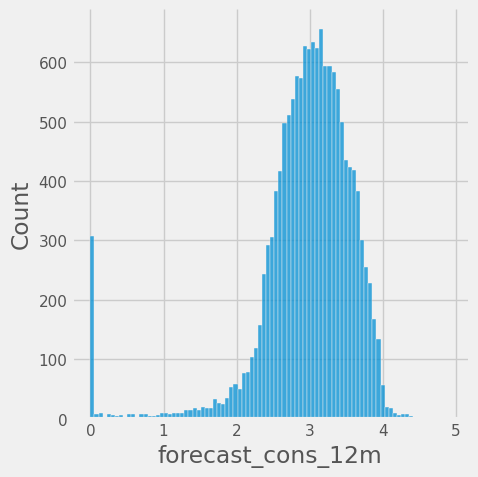

In [237]:
# plot histograms 
sns.displot((df['cons_12m'].dropna()), ax=axs[0] )
sns.displot((df[df['has_gas']==1 ]['cons_gas_12m'].dropna() ))
sns.displot((df['cons_last_month'].dropna()) )
sns.displot((df['forecast_cons_12m'].dropna()) )

### Correlations

In [238]:
correlation = df.corr()

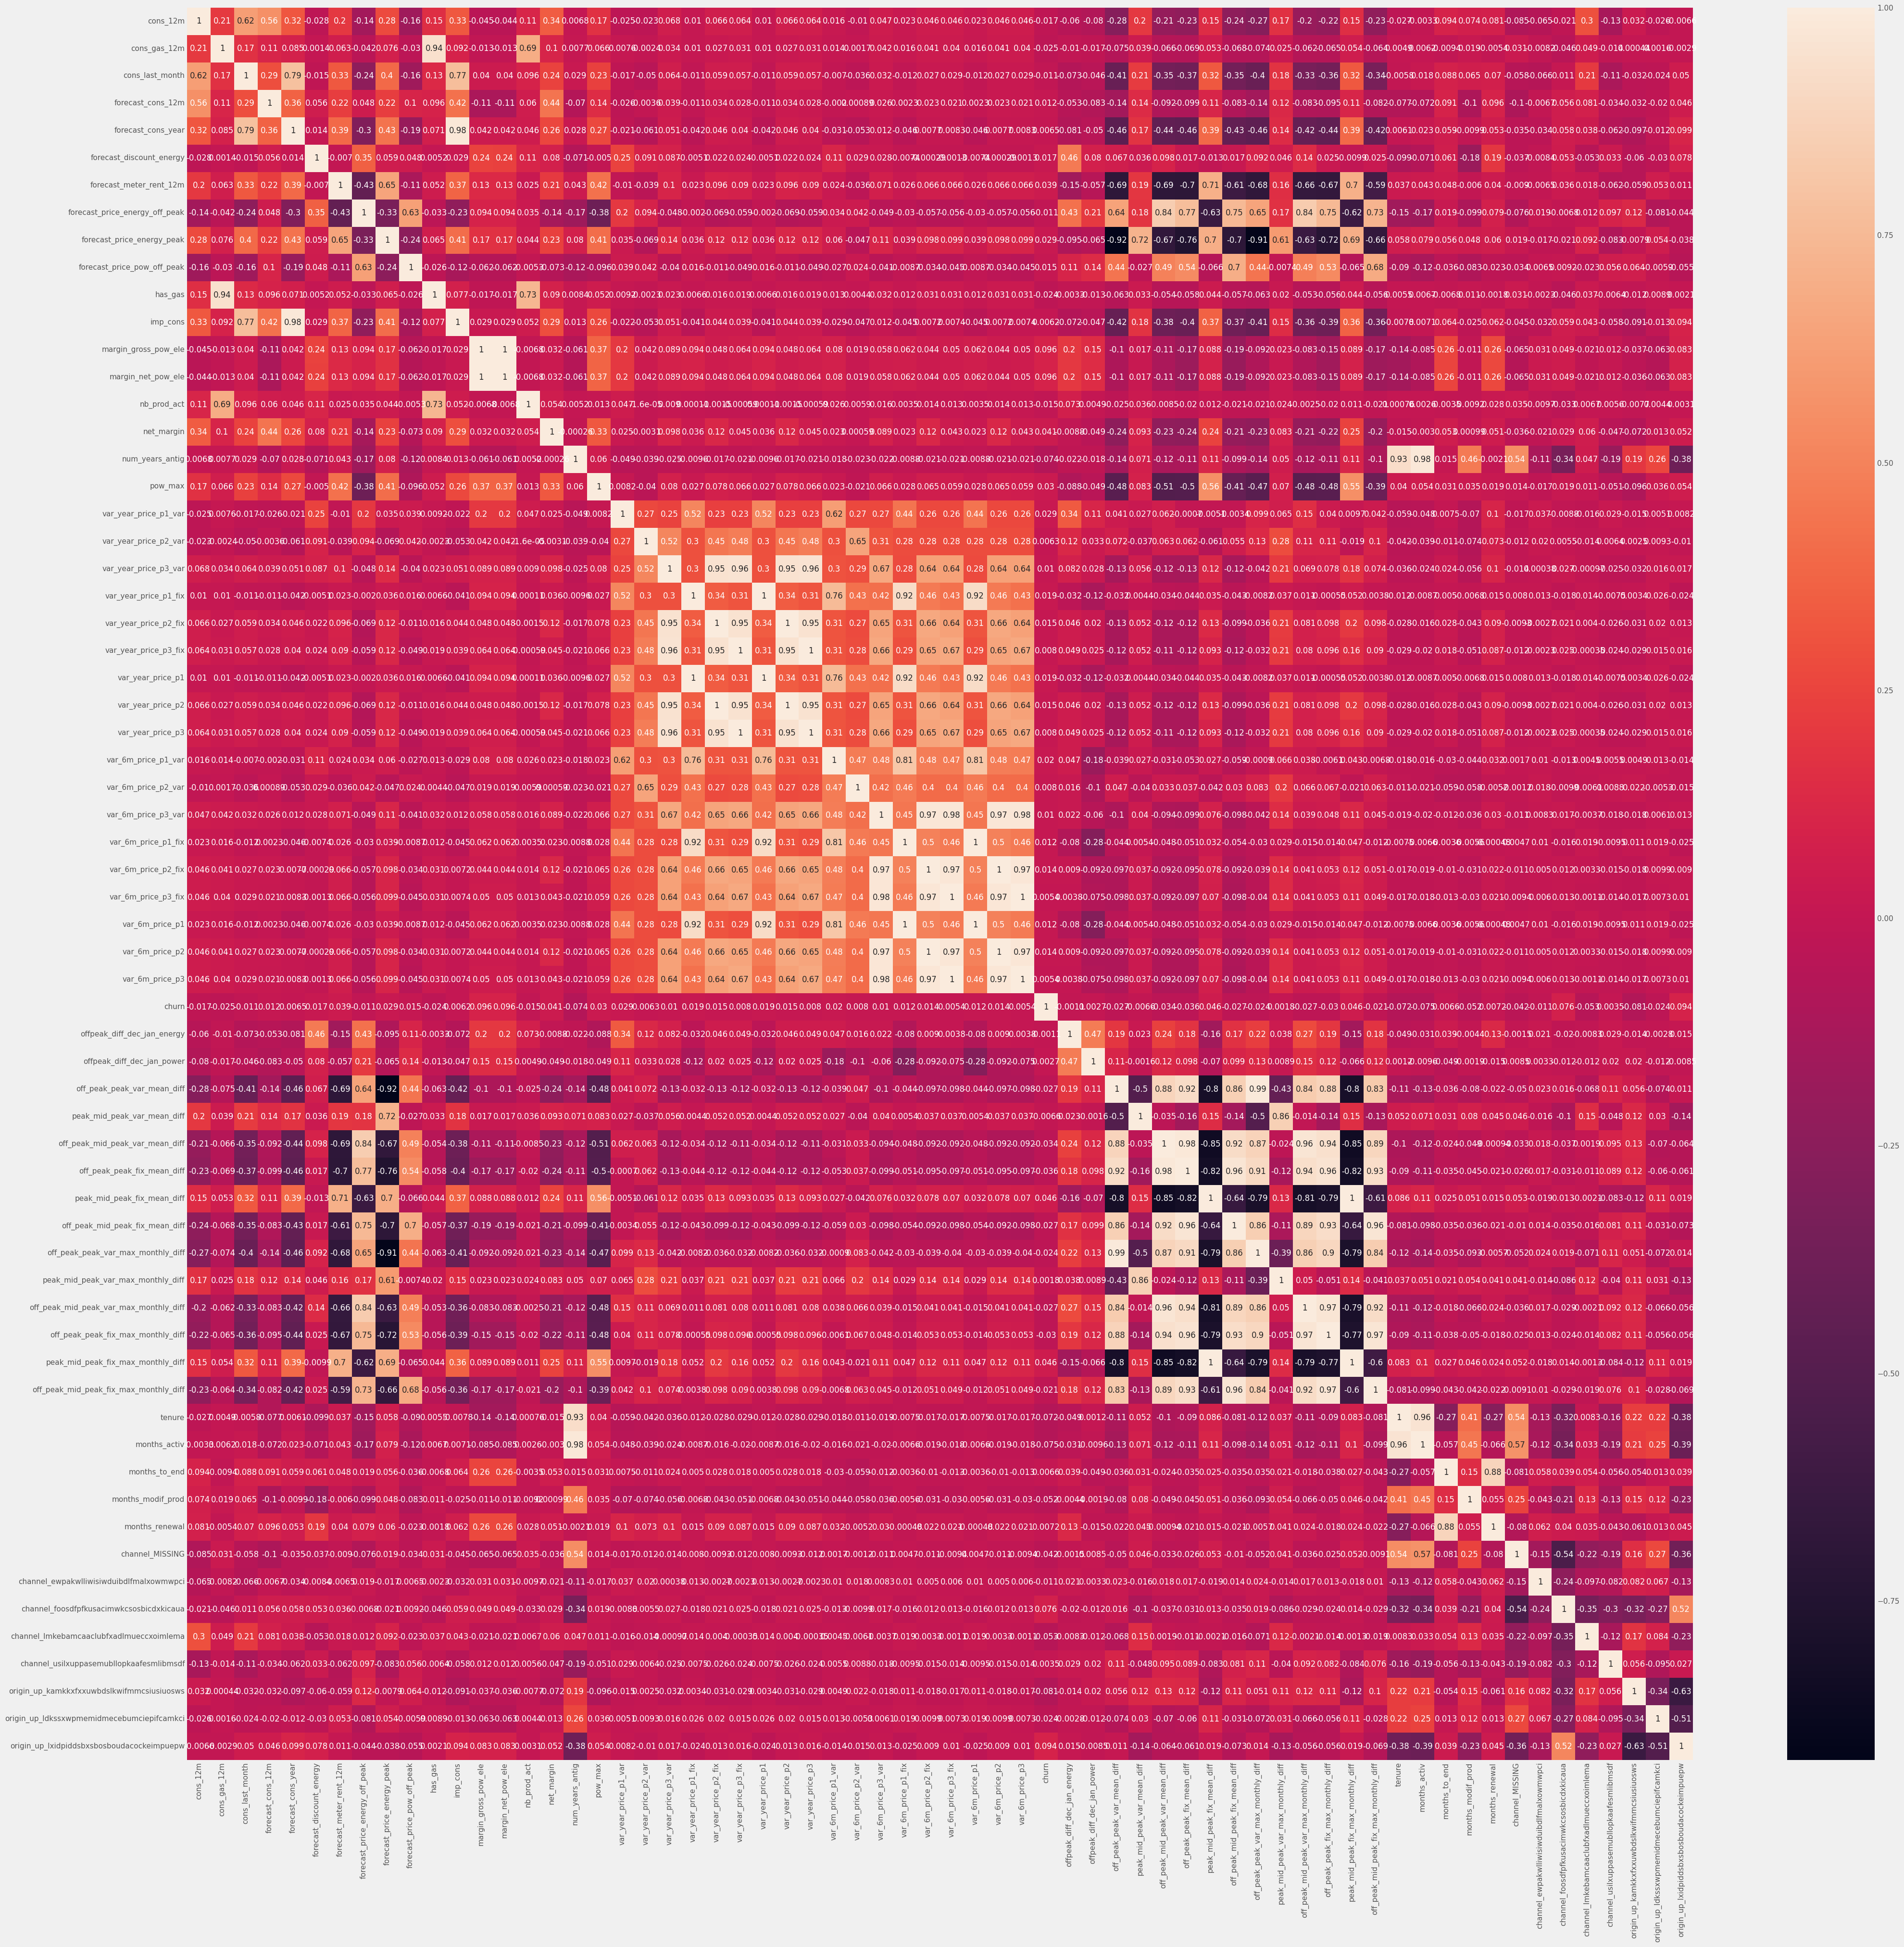

In [239]:
plt.figure(figsize=(45,45))
sns.heatmap(
    correlation, 
    annot = True,
    annot_kws={'size' : 12}
)
plt.show()

In [242]:
#df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  2               6   
1                    44.311378  ...                 76               4   
2                    44.311378  ...                 68               8   
3                    44.311378  ...                 69               9   
4                    40.606701  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 63 columns]

## Modeling

In [243]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

In [244]:
train_df = df.copy()

# separate target variable from indep variables 
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11684, 61)
(2922, 61)
(11684,)
(2922,)


### Model Training 

In [246]:
model = RandomForestClassifier(n_estimators = 1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### Model Evaluation

In [247]:
y_pred = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

In [248]:
y_test.value_counts()

0    2672
1     250
Name: churn, dtype: int64

In [249]:
print("True Positives: ", tp)
print("True Positives: ", fp)
print("True Positives: ", tn)
print("True Positives: ", fn, "\n")

print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

True Positives:  21
True Positives:  3
True Positives:  2669
True Positives:  229 

Precision:  0.875
Recall:  0.084
Accuracy:  0.920602327173169


### Feature Importance

In [250]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by = 'importance').reset_index()

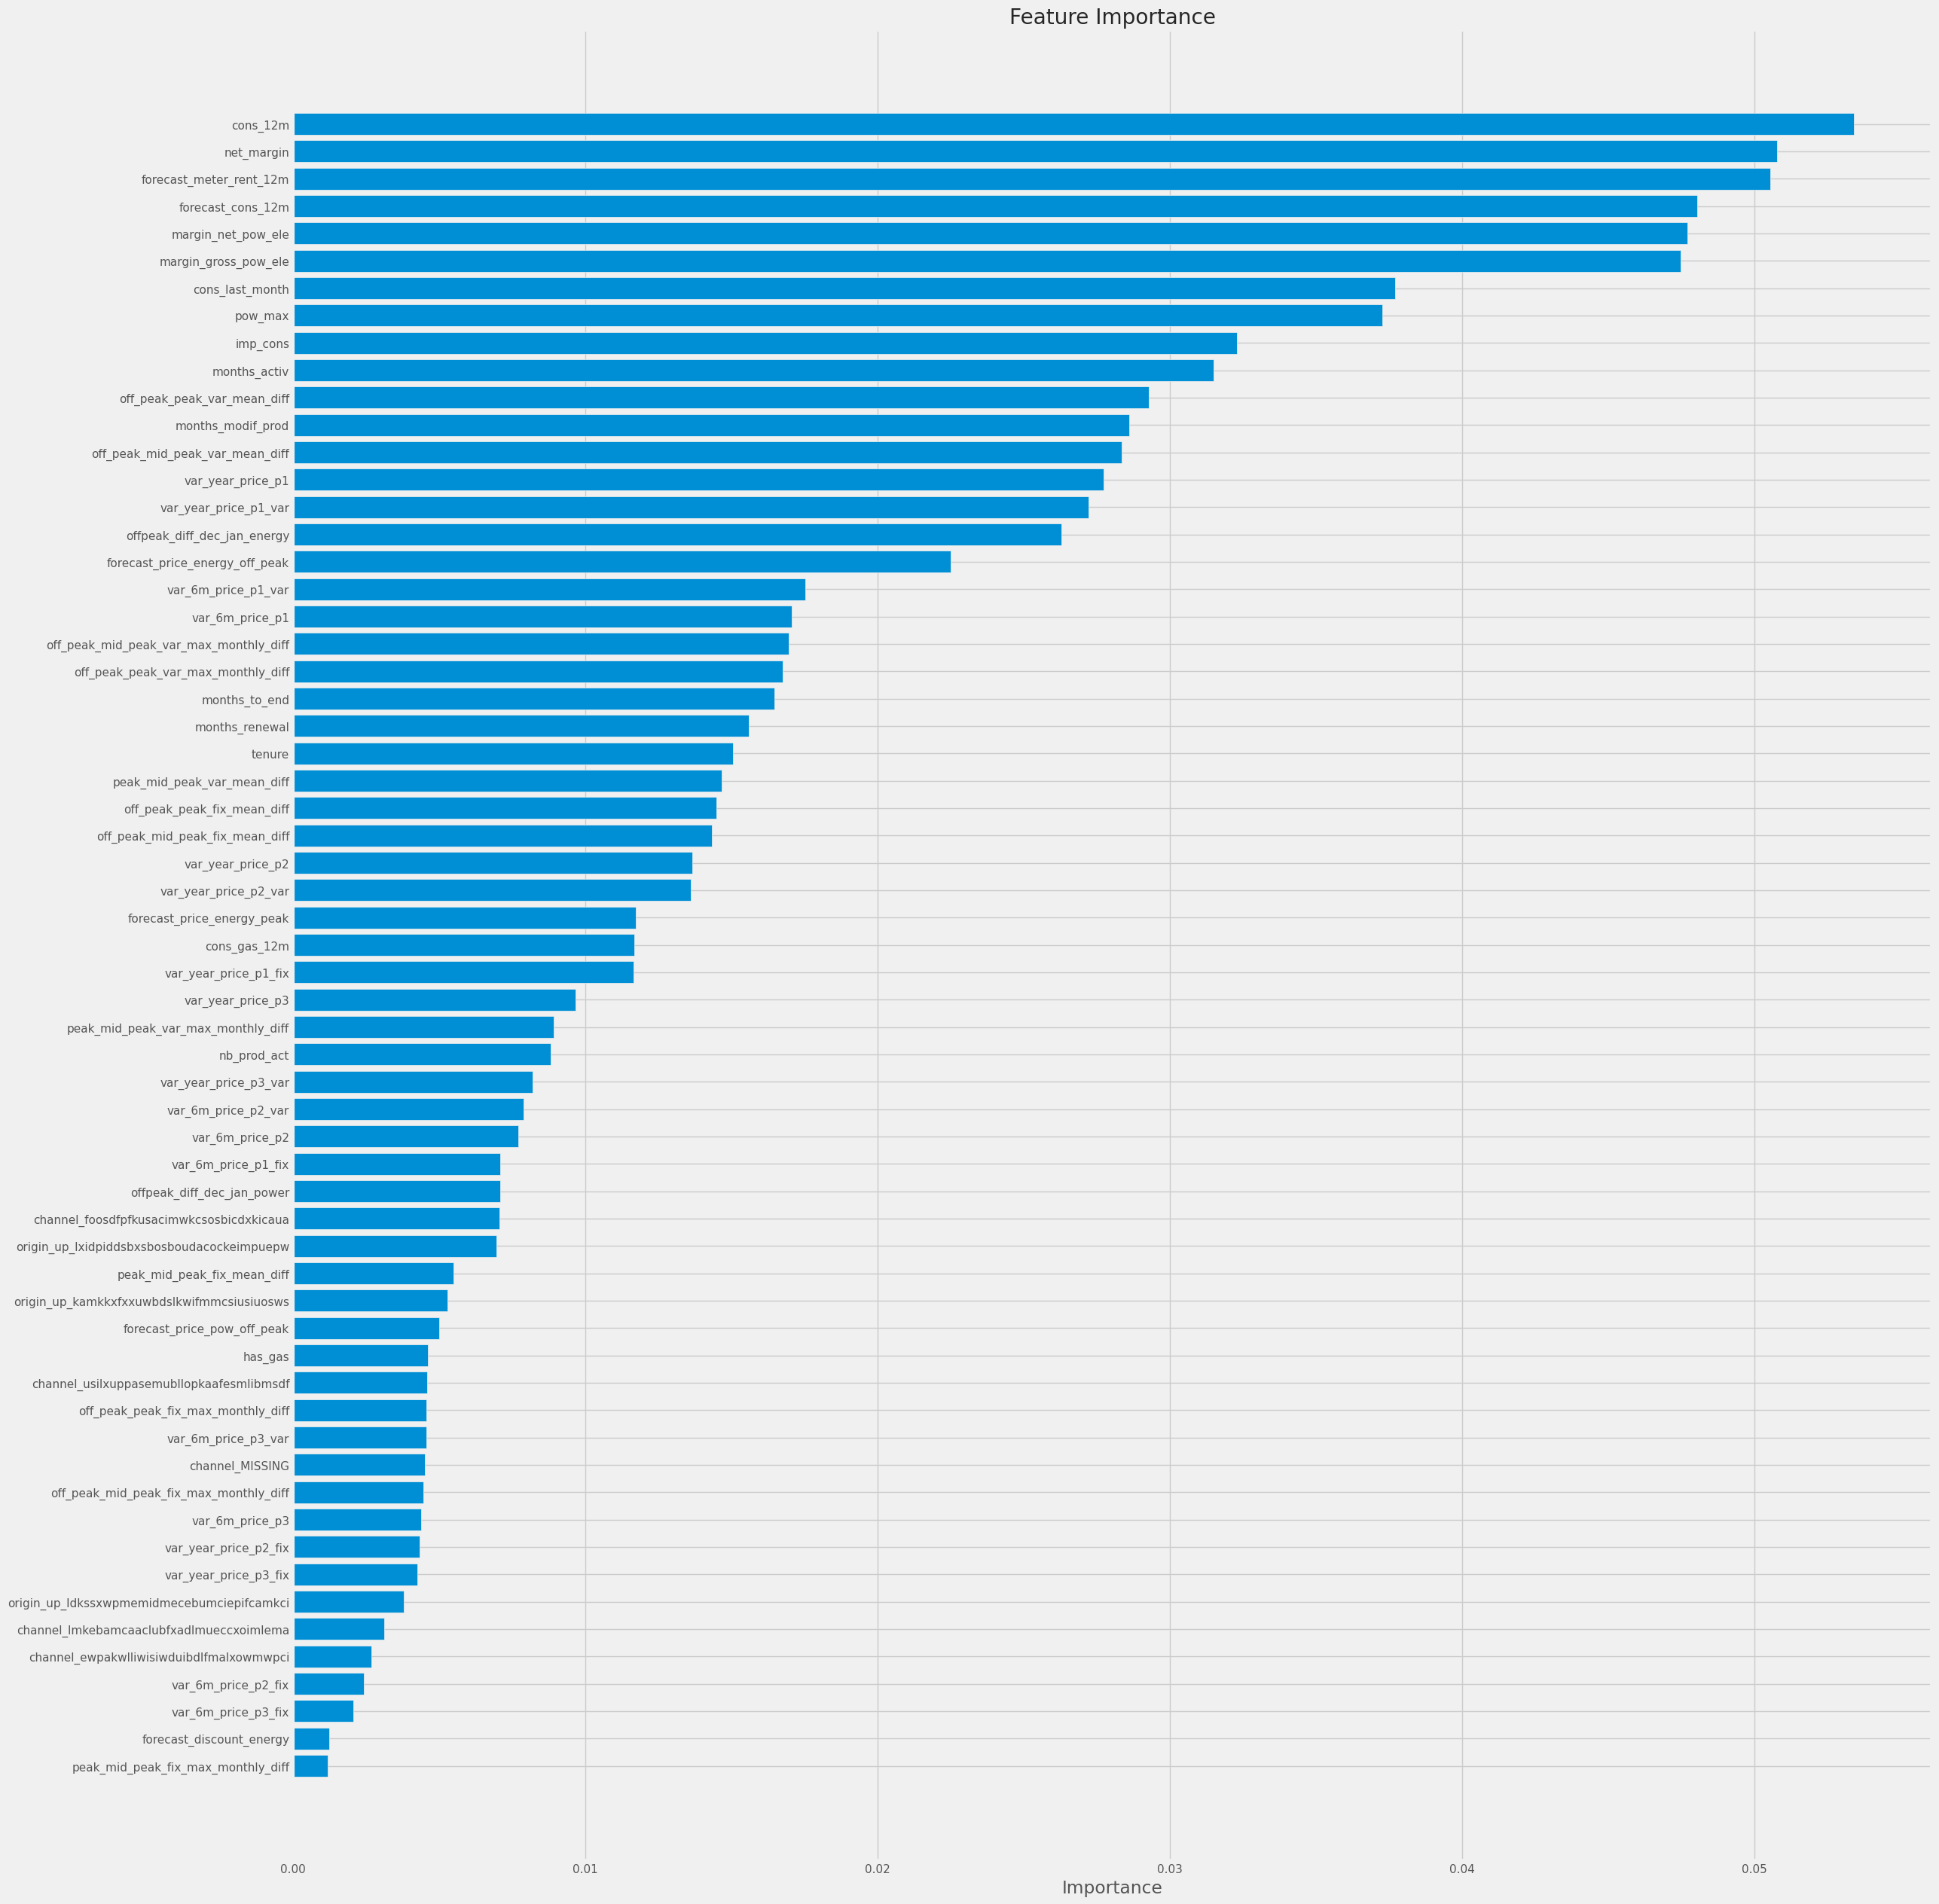

In [251]:
plt.figure(figsize = (25,30))
plt.title("Feature Importance")
plt.barh(range(len(feature_importance)), feature_importance['importance'], align = 'center' )
plt.yticks( range(len(feature_importance)), feature_importance['feature'] )
plt.xlabel('Importance')
plt.show()

In [252]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:,1]

In [253]:
X_test = X_test.reset_index()
X_test.drop(columns = 'index', inplace=True)

In [265]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_date_with_predictions.csv')

### Business Impact of the discount

In [288]:
test_df = pd.read_csv("/kaggle/working/out_of_sample_date_with_predictions.csv")
test_df.head()

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0           0  3.170848           0.0         2.298853           2.329825   
1           1  3.783117           0.0         3.364176           2.821599   
2           2  3.805841           0.0         0.000000           2.982547   
3           3  4.519644           0.0         3.407901           3.472420   
4           4  3.618048           0.0         0.000000           2.795949   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 1.276462   
1                       0.0                 1.237041   
2                       0.0                 1.262688   
3                       0.0                 2.226651   
4                       0.0                 1.234517   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.143170                    0.000000   
1                        0.162033                    0.084138   
2                        0.146348                    0.000000   
3                        0.100629                    0.091587   
4                        0.144039                    0.000000   

   forecast_price_pow_off_peak  ...  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                    44.311378  ...                                         0   
1                    44.311378  ...                                         1   
2                    45.806878  ...                                         0   
3                    58.995952  ...                                         0   
4                    45.806878  ...                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           1   
1                                           1   
2                                           1   
3                                           0   
4                                           1   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probabilities  \
0                                           0      0                0.052   
1                                           0      0                0.077   
2                                           0      0                0.054   
3                                           1      0                0.225   
4                                           0      0                0.028   

   churn_probability  
0              0.052  
1              0.077  
2              0.054  
3              0.225  
4              0.028  

[5 rows x 65 columns]

In [289]:
test_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [290]:
test_df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  3.170848           0.0         2.298853           2.329825   
1  3.783117           0.0         3.364176           2.821599   
2  3.805841           0.0         0.000000           2.982547   
3  4.519644           0.0         3.407901           3.472420   
4  3.618048           0.0         0.000000           2.795949   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 1.276462   
1                       0.0                 1.237041   
2                       0.0                 1.262688   
3                       0.0                 2.226651   
4                       0.0                 1.234517   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.143170                    0.000000   
1                        0.162033                    0.084138   
2                        0.146348                    0.000000   
3                        0.100629                    0.091587   
4                        0.144039                    0.000000   

   forecast_price_pow_off_peak  has_gas  ...  \
0                    44.311378        0  ...   
1                    44.311378        0  ...   
2                    45.806878        0  ...   
3                    58.995952        0  ...   
4                    45.806878        0  ...   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           1   
1                                           1   
2                                           1   
3                                           0   
4                                           1   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probabilities  \
0                                           0      0                0.052   
1                                           0      0                0.077   
2                                           0      0                0.054   
3                                           1      0                0.225   
4                                           0      0                0.028   

   churn_probability  
0              0.052  
1              0.077  
2              0.054  
3              0.225  
4              0.028  

[5 rows x 64 columns]

### Calculating the baseline revenue estimate (no interventions) 

- **Electricity Revenue** for each client consists of energy consumption (amount * price) and the meter rent
- Reversing the log10 transformations 

In [291]:
test_df['basecase_revenue'] = (np.power(10, test_df['forecast_cons_12m']) + 1) * test_df['forecast_price_energy_off_peak']  + test_df['forecast_meter_rent_12m']
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn'])

In [270]:
test_df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  3.170848           0.0         2.298853           2.329825   
1  3.783117           0.0         3.364176           2.821599   
2  3.805841           0.0         0.000000           2.982547   
3  4.519644           0.0         3.407901           3.472420   
4  3.618048           0.0         0.000000           2.795949   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 1.276462   
1                       0.0                 1.237041   
2                       0.0                 1.262688   
3                       0.0                 2.226651   
4                       0.0                 1.234517   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.143170                    0.000000   
1                        0.162033                    0.084138   
2                        0.146348                    0.000000   
3                        0.100629                    0.091587   
4                        0.144039                    0.000000   

   forecast_price_pow_off_peak  has_gas  ...  \
0                    44.311378        0  ...   
1                    44.311378        0  ...   
2                    45.806878        0  ...   
3                    58.995952        0  ...   
4                    45.806878        0  ...   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           1   
1                                           1   
2                                           1   
3                                           0   
4                                           1   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_probabilities  \
0                                           0      0                0.052   
1                                           0      0                0.077   
2                                           0      0                0.054   
3                                           1      0                0.225   
4                                           0      0                0.028   

   churn_probability  basecase_revenue  basecase_revenue_after_churn  
0              0.052         32.016493                     32.016493  
1              0.077        108.848017                    108.848017  
2              0.054        141.992389                    141.992389  
3              0.225        300.963964                    300.963964  
4              0.028         91.417335                     91.417335  

[5 rows x 66 columns]

### Calculating the estimated benefits and costs of intervention

Based on a cut-off probability:
 - Customer with a higher-churn probabilities than the cut-off get a discount
 - Customer below the churn-probabilities do not get a discount
 
 *Assumption for intervention*: Customers who are likely to churn will be offered discounts will accept it and the customers who will not receive a discount will not churn in the 12 months. The retained customer revenue is 0.8 * basecase_revenu b/c `(1 - dicount_fraction)basecase_revenu - "Customers who do not receive a discount are assument to churn based on the observed dependent variable"`. 
 
 Mapping out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability will optimise the revenue outcome -> Assuming for calculations no change in consumption due to price changes. 
 
>  In practice often customer consumption increases with decreasing prices. 
>  
 - If a customer is a True Positive than there will be a revenue due to retention
 - If a customer is a false positive there will be a reduction in revenue 
 
**The best cut-off point will be finding a balance between the benefits of the true postive and the cost of false positives.**

In [295]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float = 0.5, discount: float=0.2)->float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk greater than or equal to cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # churn predicted -> discount given -> customer stays for 12 months, independent of predictions
    # (false_positive, "free"/unneccessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a seperate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

In [297]:
# Generate a list of possible cutoffs and the corresponding overall revenue delta
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0,1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # plot the revenue delta
    rev_deltas.plot()
    # Marking the optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c = 'g')
    # Reference line for marking break-even
    plt.hlines(0,0,1)
    plt.show()
    print(f"Max benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}")

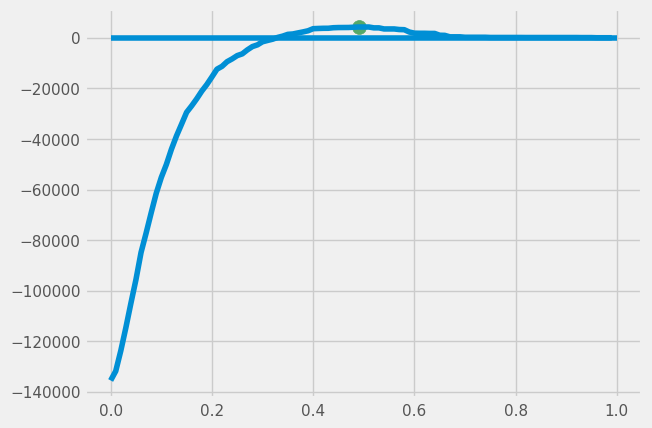

Max benefit at cutoff 0.49 with revenue delta of $4,277.33


In [298]:
plot_tradeoff(rev_deltas)

### Selecting the Cut-off
Find the most optimal strategy for offering discounts 
- Based on the cutoff model discounts may be offered to customers who are not very profitable resulting in worsening margins substantially. For example if offering a discount results in unprofitability on a net margin basis it might be better to let the customer churn.

A general principle that is applied here is that PowerCo. can afford to spend more on retaining high-value customers since losing the customer may have a higher cost. It's important to keep the value impact of decisions over simply the churn probabilities. 

In [312]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float = 0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with 
    predicted churn risk greater than or equal to cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # churn predicted -> discount given -> customer stays for 12 months, independent of predictions
    # (false_positive, "free"/unneccessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev ), 
             'discount_revenue' ] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a seperate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

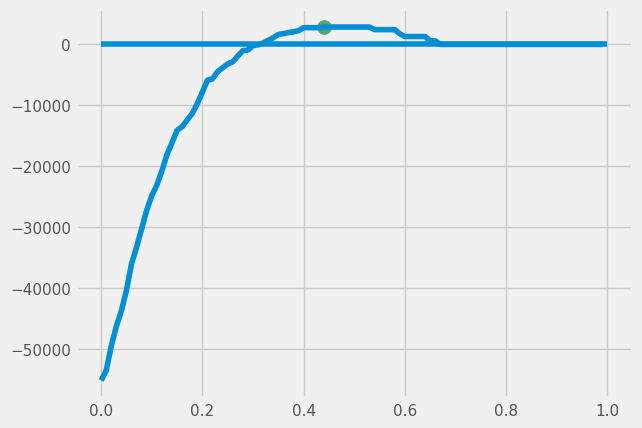

Max benefit at cutoff 0.44 with revenue delta of $2,853.69


In [314]:
rev_deltas_high_values = pd.Series({cutoff: get_rev_delta_high_value(test_df, cutoff=cutoff) for cutoff in np.arange(0,1, 0.01)})
# Plotting possible cutoffs and revenue
plot_tradeoff(rev_deltas_high_values)

### Using forecast over actual churn 

> Backtesting

Acutal churn is great for retrospective analysis to assess the effectiveness of a strategy.

Utilizing the model to forcasted data:
Optimizing by using the predicts and forecast revenue based on the porbabilities of churn from the model. 

Bad model can result in bad forecasting so it's better to be extra careful.

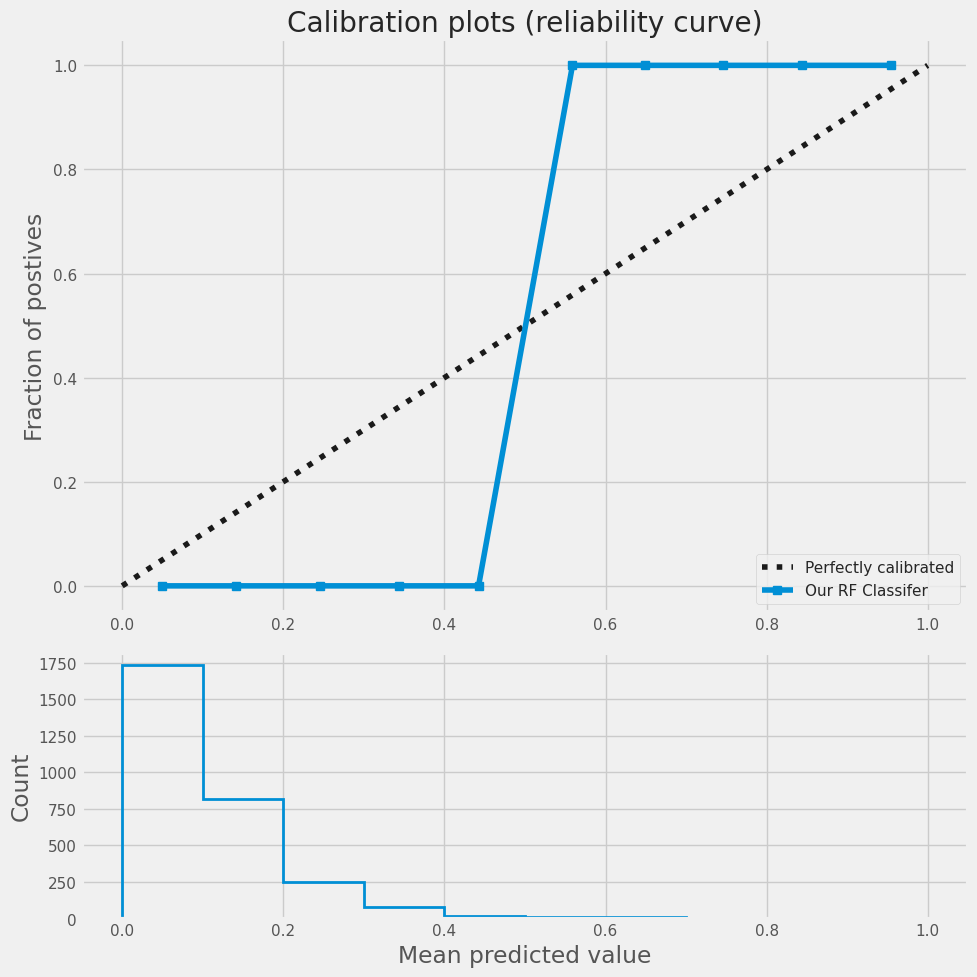

In [315]:
# checking calibration
# (code copied from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)
from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((3,1), (0,0), rowspan =2)
ax2 = plt.subplot2grid((3,1) , (2,0))
ax1.plot([0,1], [0,1], "k:", label="Perfectly calibrated" )
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true = test_df['churn'],
    y_prob = test_df['churn_probability'],
    n_bins = 10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF Classifer")
ax2.hist(test_df['churn_probability'], range=(0,1), bins = 10, histtype="step", lw=2 )
ax1.set_ylabel("Fraction of postives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title("Calibration plots (reliability curve)")
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

- Top calibration chart is exhibits a sigmoid curve, that is typical for an under-confident classifer. 
- The bottom chart shows that the model is positively skewed toward predicting a probability, this may be due to having such low confidence. 

In [317]:
test_df['basecase_revenue'] = np.power(10, test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] \
+ test_df['forecast_meter_rent_12m']
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn_probability'])

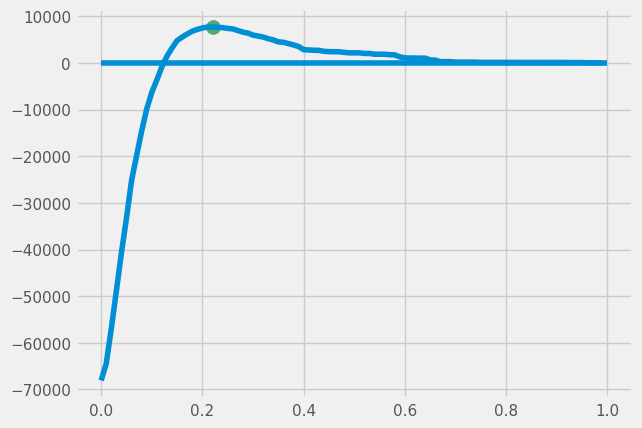

Max benefit at cutoff 0.22 with revenue delta of $7,715.00


In [318]:
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0,1, 0.01)})
plot_tradeoff(rev_deltas)

Offering a 20% discount to all customers predicted to churn does not seem to be an optimal strategy. Since assuming a customer offered a discount will not churn and this is not true in reality. 

Can try to find an optimal strategy that will can be used to optimise either revenue or profits based on a function of price, margin, etc. for each customer.

**Objective**: maximize net revenue (ie including the benefits of true positives and the cost of
false positives)
- Decision variables:
    - Level of discount offered, and
    - Fraction of people who are offered a discount

In [319]:
test_df.to_csv("test_df.csv")